In [1]:
pip install pandas pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# membaca Dataset DNS Testing
df_DNS_Testing = pd.read_parquet("C:\Data Raihan\Penelitian Threshold\Dataset\CIC-DDoS2019\DNS-testing.parquet")
df_DNS_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  6703 non-null   int8    
 1   Flow Duration             6703 non-null   int32   
 2   Total Fwd Packets         6703 non-null   int16   
 3   Total Backward Packets    6703 non-null   int16   
 4   Fwd Packets Length Total  6703 non-null   float32 
 5   Bwd Packets Length Total  6703 non-null   float32 
 6   Fwd Packet Length Max     6703 non-null   float32 
 7   Fwd Packet Length Min     6703 non-null   float32 
 8   Fwd Packet Length Mean    6703 non-null   float32 
 9   Fwd Packet Length Std     6703 non-null   float32 
 10  Bwd Packet Length Max     6703 non-null   float32 
 11  Bwd Packet Length Min     6703 non-null   float32 
 12  Bwd Packet Length Mean    6703 non-null   float32 
 13  Bwd Packet Length Std     6703 non-null   float3

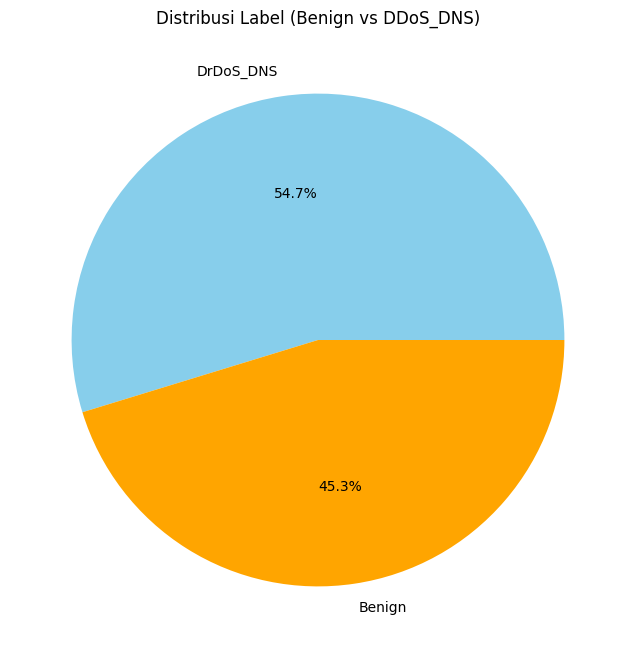

Deskripsi Distribusi Label:
DrDoS_DNS    3669
Benign       3034
Name: Label, dtype: int64


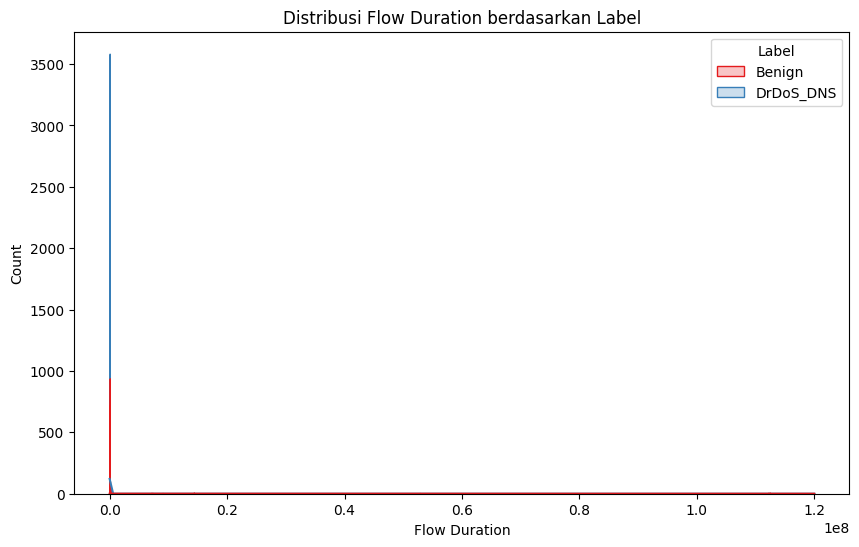


Deskripsi Flow Duration:
            count          mean           std  min      25%      50%  \
Label                                                                  
Benign     3034.0  9.732791e+06  2.867105e+07  1.0  20566.0  20945.5   
DrDoS_DNS  3669.0  5.569772e+03  1.368898e+05  1.0      1.0      2.0   

                75%          max  
Label                             
Benign     108040.0  119981035.0  
DrDoS_DNS      46.0    5636608.0  


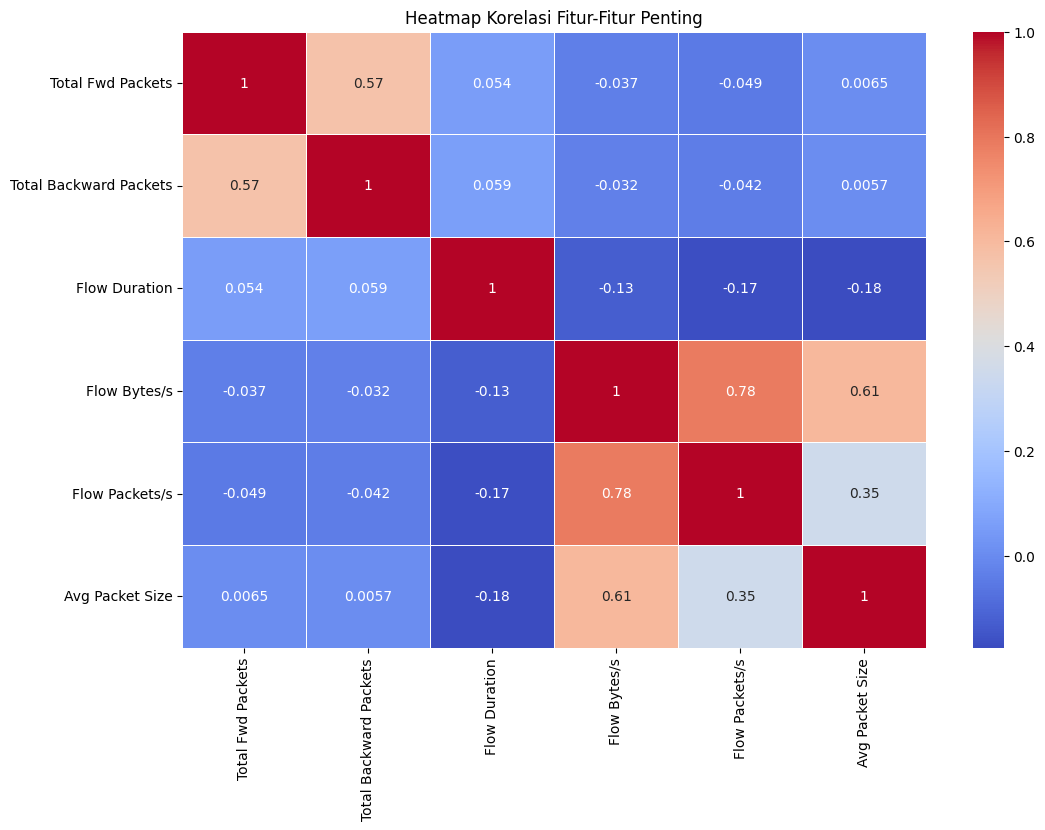


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.566415   
Total Backward Packets           0.566415                1.000000   
Flow Duration                    0.053817                0.058637   
Flow Bytes/s                    -0.037013               -0.031963   
Flow Packets/s                  -0.048868               -0.042173   
Avg Packet Size                  0.006502                0.005679   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.053817     -0.037013       -0.048868   
Total Backward Packets       0.058637     -0.031963       -0.042173   
Flow Duration                1.000000     -0.127475       -0.168068   
Flow Bytes/s                -0.127475      1.000000        0.784937   
Flow Packets/s              -0.168068      0.784937        1.000000   
Avg Packet Size             -0.175945      0.607695        0.34

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\572353567.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_DNS_Testing, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\572353567.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_DNS_Testing, palette="Set2")


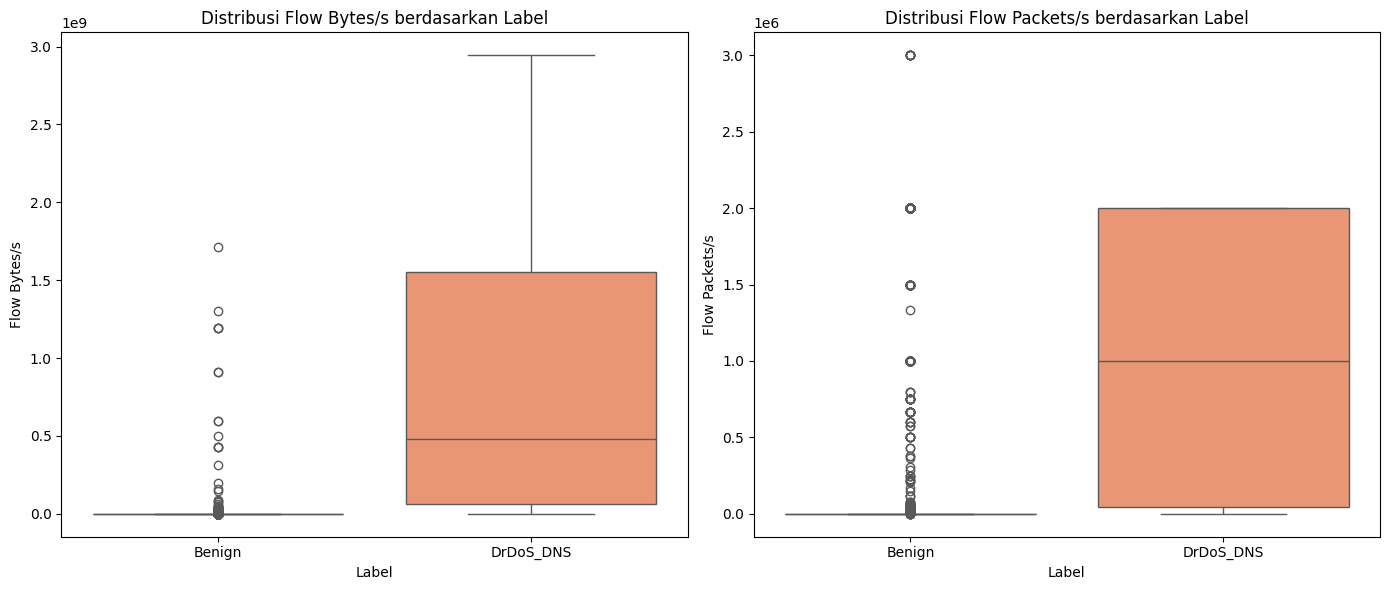


Deskripsi Flow Bytes/s dan Flow Packets/s:
          Flow Bytes/s                                                 \
                 count          mean           std  min           25%   
Label                                                                   
Benign          3034.0  4.717066e+06  6.360356e+07  0.0  0.000000e+00   
DrDoS_DNS       3669.0  9.847907e+08  1.086526e+09  0.0  6.133333e+07   

                                                    Flow Packets/s  \
                    50%           75%           max          count   
Label                                                                
Benign     2.958627e+03  1.232215e+04  1.715000e+09         3034.0   
DrDoS_DNS  4.800000e+08  1.552000e+09  2.944000e+09         3669.0   

                                                                               \
                   mean           std       min           25%             50%   
Label                                                                        

In [4]:
# Visualisasi distribusi label (Benign vs DDoS_DNS)
plt.figure(figsize=(8, 8))
df_DNS_Testing["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label (Benign vs DDoS_DNS)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")
label_counts = df_DNS_Testing["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_DNS_Testing, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_DNS_Testing.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_DNS_Testing[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_DNS_Testing[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_DNS_Testing, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_DNS_Testing, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_DNS_Testing.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())

# Pemilihan fitur Flow Duration didasarkan pada kemampuannya untuk memberikan informasi penting tentang durasi komunikasi jaringan,
# yang bisa sangat relevan dalam mendeteksi pola-pola serangan atau anomali dalam trafik jaringan.

In [5]:
# membaca Dataset LDAP Testing
df_LDAP_Testing = pd.read_parquet("C:\Data Raihan\Penelitian Threshold\Dataset\CIC-DDoS2019\LDAP-testing.parquet")
df_LDAP_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2831 entries, 0 to 2830
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  2831 non-null   int8    
 1   Flow Duration             2831 non-null   int32   
 2   Total Fwd Packets         2831 non-null   int16   
 3   Total Backward Packets    2831 non-null   int16   
 4   Fwd Packets Length Total  2831 non-null   float32 
 5   Bwd Packets Length Total  2831 non-null   float32 
 6   Fwd Packet Length Max     2831 non-null   float32 
 7   Fwd Packet Length Min     2831 non-null   float32 
 8   Fwd Packet Length Mean    2831 non-null   float32 
 9   Fwd Packet Length Std     2831 non-null   float32 
 10  Bwd Packet Length Max     2831 non-null   float32 
 11  Bwd Packet Length Min     2831 non-null   float32 
 12  Bwd Packet Length Mean    2831 non-null   float32 
 13  Bwd Packet Length Std     2831 non-null   float3

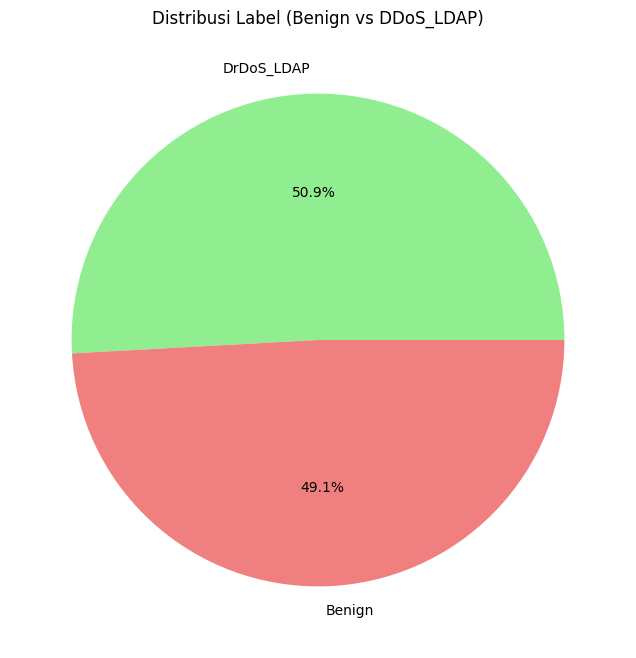

Deskripsi Distribusi Label:
DrDoS_LDAP    1440
Benign        1391
Name: Label, dtype: int64


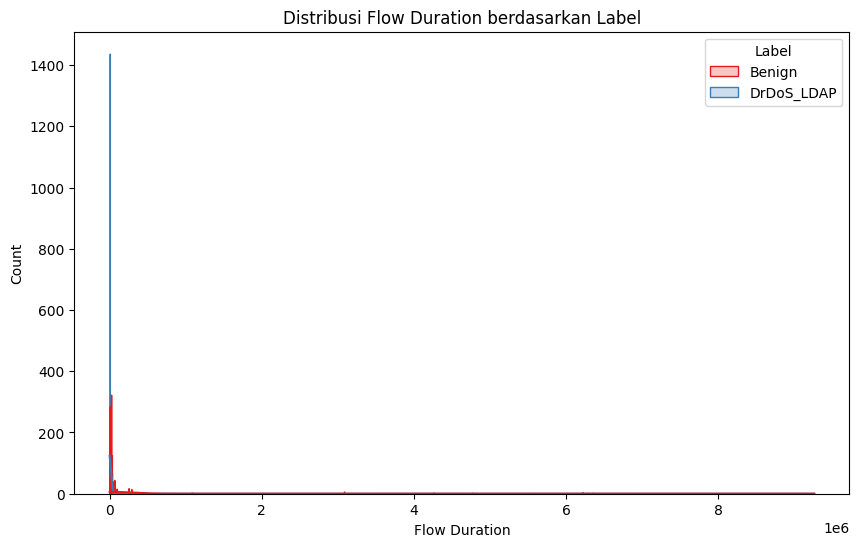


Deskripsi Flow Duration:
             count           mean           std  min      25%      50%  \
Label                                                                    
Benign      1391.0  305597.214953  1.051164e+06  1.0  20624.0  24747.0   
DrDoS_LDAP  1440.0    2267.506944  5.960165e+04  1.0      1.0      2.0   

                75%        max  
Label                           
Benign      62194.5  9258167.0  
DrDoS_LDAP     46.0  2019774.0  


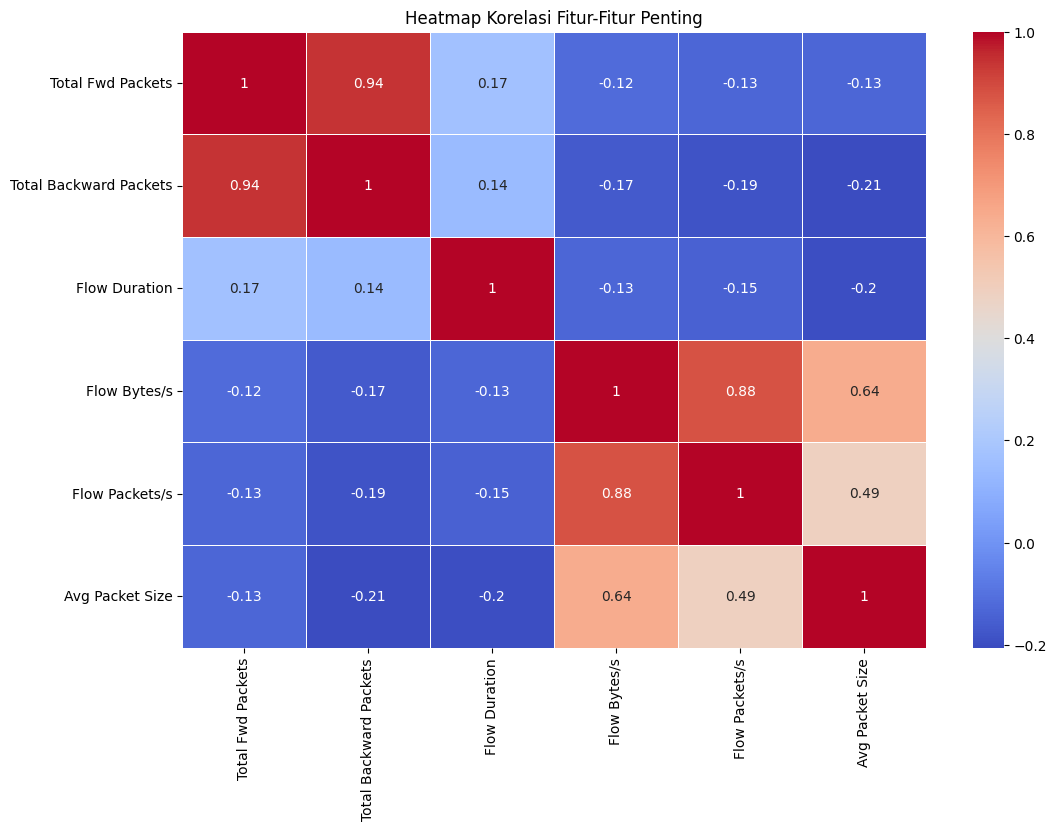


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.941806   
Total Backward Packets           0.941806                1.000000   
Flow Duration                    0.168446                0.141665   
Flow Bytes/s                    -0.120057               -0.165814   
Flow Packets/s                  -0.131240               -0.185099   
Avg Packet Size                 -0.133334               -0.205881   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.168446     -0.120057       -0.131240   
Total Backward Packets       0.141665     -0.165814       -0.185099   
Flow Duration                1.000000     -0.131771       -0.147681   
Flow Bytes/s                -0.131771      1.000000        0.881124   
Flow Packets/s              -0.147681      0.881124        1.000000   
Avg Packet Size             -0.198230      0.637520        0.48

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\2009128662.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_LDAP_Testing, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\2009128662.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_LDAP_Testing, palette="Set2")


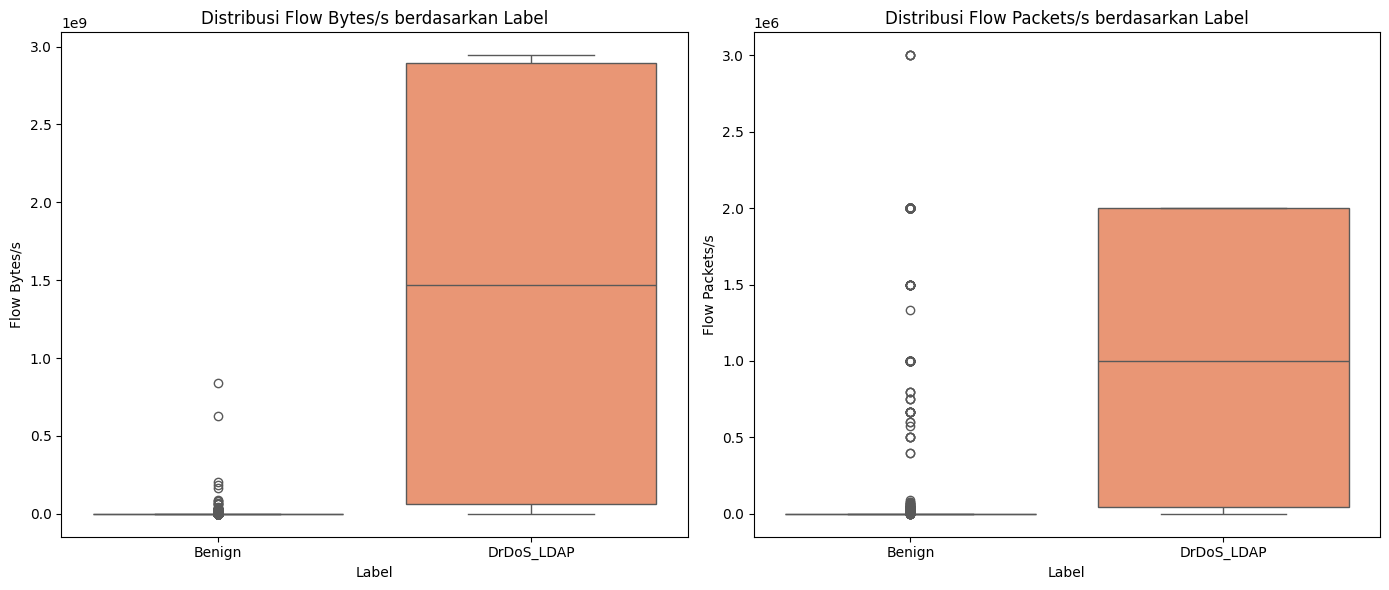


Deskripsi Flow Bytes/s dan Flow Packets/s:
           Flow Bytes/s                                                 \
                  count          mean           std  min           25%   
Label                                                                    
Benign           1391.0  2.540961e+06  3.010695e+07  0.0  4.860563e+01   
DrDoS_LDAP       1440.0  1.437727e+09  1.199957e+09  0.0  6.480000e+07   

                                                     Flow Packets/s  \
                     50%           75%           max          count   
Label                                                                 
Benign      1.967620e+03  1.253224e+04  8.380000e+08         1391.0   
DrDoS_LDAP  1.472000e+09  2.896000e+09  2.944000e+09         1440.0   

                                                                 \
                    mean            std       min           25%   
Label                                                             
Benign      1.816019e+05  53

In [6]:
# Visualisasi distribusi label (Benign vs DDoS_LDAP)
plt.figure(figsize=(8, 8))
df_LDAP_Testing["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['lightgreen', 'lightcoral'])
plt.title("Distribusi Label (Benign vs DDoS_LDAP)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")
label_counts = df_LDAP_Testing["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_LDAP_Testing, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_LDAP_Testing.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_LDAP_Testing[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_LDAP_Testing[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_LDAP_Testing, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_LDAP_Testing, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_LDAP_Testing.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [7]:
# membaca Dataset LDAP Training
df_LDAP_Training = pd.read_parquet("C:\Data Raihan\Penelitian Threshold\Dataset\CIC-DDoS2019\LDAP-training.parquet")
df_LDAP_Training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6715 entries, 0 to 6714
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  6715 non-null   int8    
 1   Flow Duration             6715 non-null   int32   
 2   Total Fwd Packets         6715 non-null   int32   
 3   Total Backward Packets    6715 non-null   int16   
 4   Fwd Packets Length Total  6715 non-null   float32 
 5   Bwd Packets Length Total  6715 non-null   float32 
 6   Fwd Packet Length Max     6715 non-null   float32 
 7   Fwd Packet Length Min     6715 non-null   float32 
 8   Fwd Packet Length Mean    6715 non-null   float32 
 9   Fwd Packet Length Std     6715 non-null   float32 
 10  Bwd Packet Length Max     6715 non-null   float32 
 11  Bwd Packet Length Min     6715 non-null   float32 
 12  Bwd Packet Length Mean    6715 non-null   float32 
 13  Bwd Packet Length Std     6715 non-null   float3

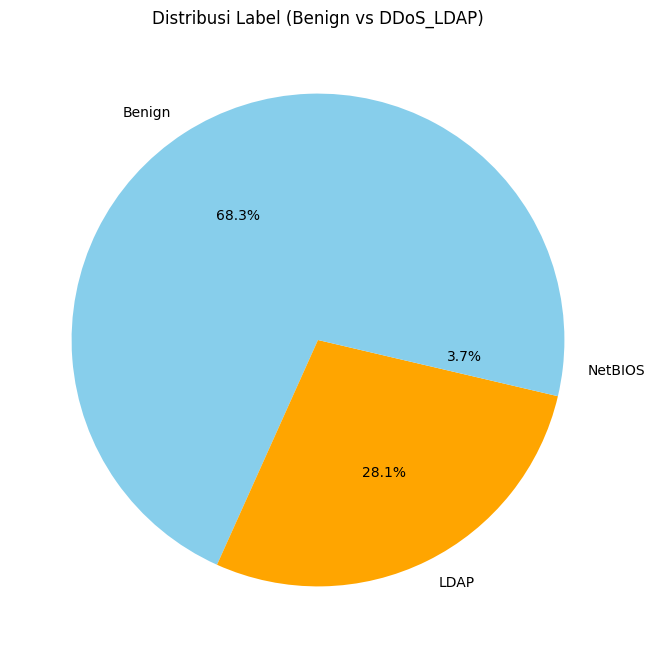

Deskripsi Distribusi Label:
Benign     4585
LDAP       1884
NetBIOS     246
Name: Label, dtype: int64


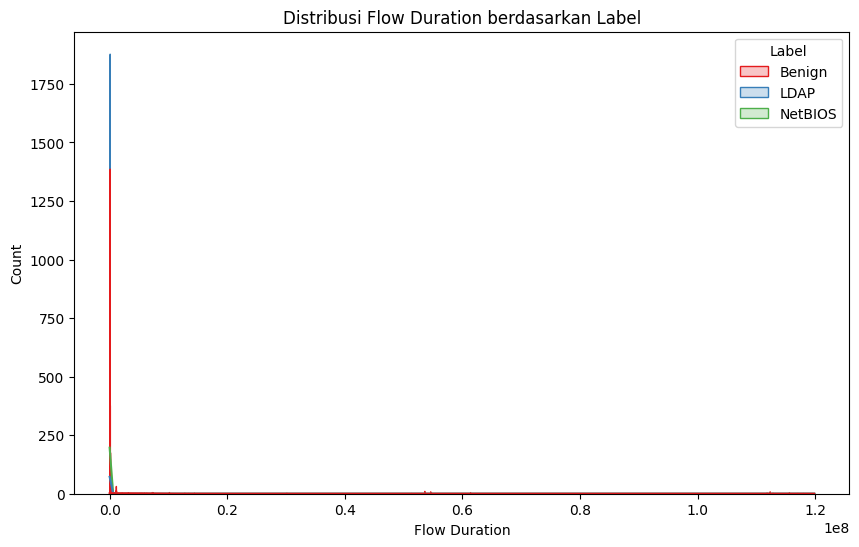


Deskripsi Flow Duration:
          count          mean           std  min    25%      50%       75%  \
Label                                                                        
Benign   4585.0  8.497951e+06  2.571213e+07  1.0  239.0  35845.0  350067.0   
LDAP     1884.0  1.242729e+04  3.023218e+05  1.0    1.0      1.0       3.0   
NetBIOS   246.0  6.881098e+02  9.585576e+03  1.0    2.0     46.5      49.0   

                 max  
Label                 
Benign   119812220.0  
LDAP       8365139.0  
NetBIOS     150040.0  


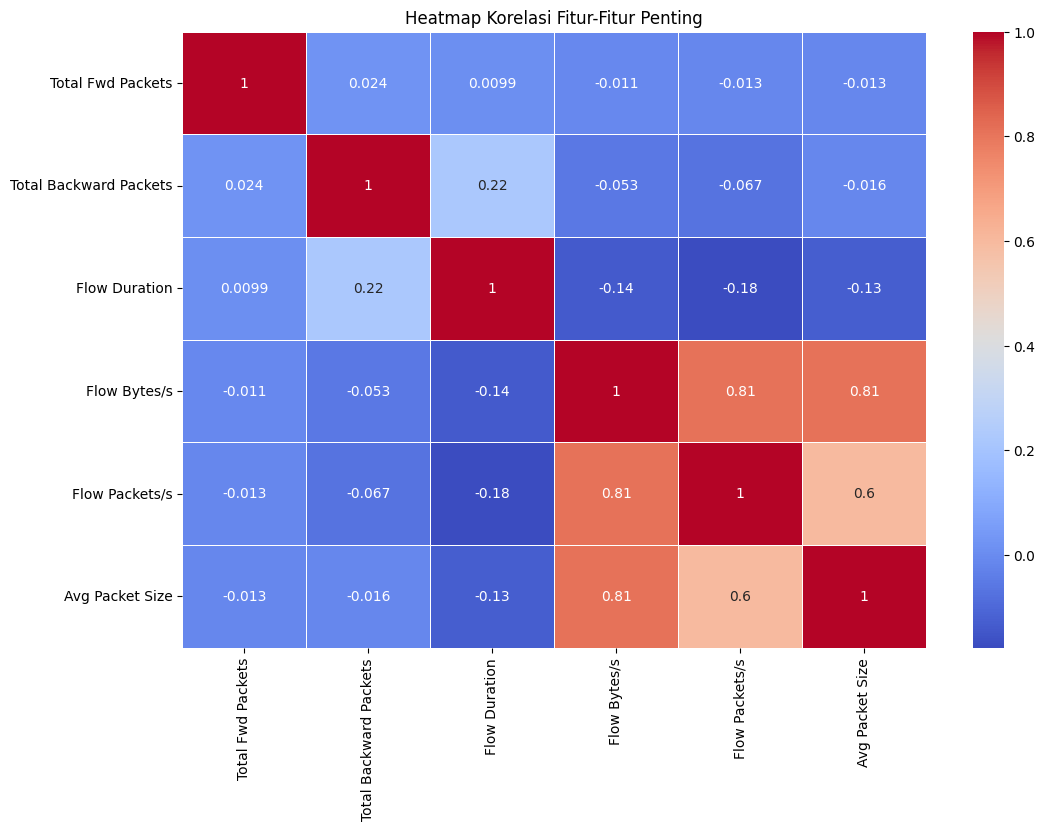


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.024363   
Total Backward Packets           0.024363                1.000000   
Flow Duration                    0.009887                0.219985   
Flow Bytes/s                    -0.010700               -0.053028   
Flow Packets/s                  -0.013363               -0.067042   
Avg Packet Size                 -0.012990               -0.016089   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.009887     -0.010700       -0.013363   
Total Backward Packets       0.219985     -0.053028       -0.067042   
Flow Duration                1.000000     -0.139432       -0.177109   
Flow Bytes/s                -0.139432      1.000000        0.809390   
Flow Packets/s              -0.177109      0.809390        1.000000   
Avg Packet Size             -0.128295      0.808437        0.59

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\237703388.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_LDAP_Training, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\237703388.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_LDAP_Training, palette="Set2")


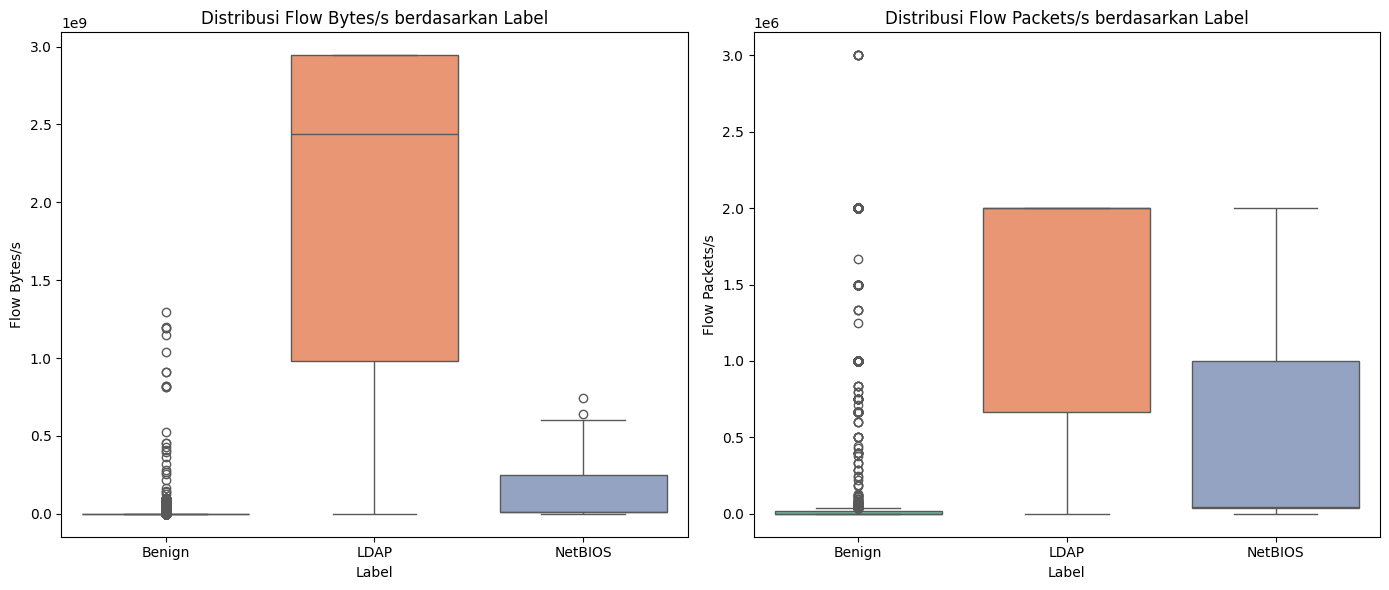


Deskripsi Flow Bytes/s dan Flow Packets/s:
        Flow Bytes/s                                                 \
               count          mean           std  min           25%   
Label                                                                 
Benign        4585.0  6.352390e+06  5.686758e+07  0.0  6.389793e+00   
LDAP          1884.0  1.883594e+09  1.139902e+09  0.0  9.813333e+08   
NetBIOS        246.0  1.414444e+08  1.977964e+08  0.0  9.160000e+06   

                                                  Flow Packets/s  \
                  50%           75%           max          count   
Label                                                              
Benign   2.758050e+03  3.409661e+04  1.298000e+09         4585.0   
LDAP     2.440000e+09  2.944000e+09  2.944000e+09         1884.0   
NetBIOS  1.029167e+07  2.470000e+08  7.460000e+08          246.0   

                                                                              \
                 mean            std    

In [8]:
# Visualisasi distribusi label (Benign vs DDoS_LDAP)
plt.figure(figsize=(8, 8))
df_LDAP_Training["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label (Benign vs DDoS_LDAP)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")
label_counts = df_LDAP_Training["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_LDAP_Training, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_LDAP_Training.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_LDAP_Training[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_LDAP_Training[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_LDAP_Training, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_LDAP_Training, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_LDAP_Training.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [9]:
# membaca Dataset MySQL Testing
df_MySQL_Testing = pd.read_parquet("C:\Data Raihan\Penelitian Threshold\Dataset\CIC-DDoS2019\MSSQL-testing.parquet")
df_MySQL_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8083 entries, 0 to 8082
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  8083 non-null   int8    
 1   Flow Duration             8083 non-null   int32   
 2   Total Fwd Packets         8083 non-null   int16   
 3   Total Backward Packets    8083 non-null   int16   
 4   Fwd Packets Length Total  8083 non-null   float32 
 5   Bwd Packets Length Total  8083 non-null   float32 
 6   Fwd Packet Length Max     8083 non-null   float32 
 7   Fwd Packet Length Min     8083 non-null   float32 
 8   Fwd Packet Length Mean    8083 non-null   float32 
 9   Fwd Packet Length Std     8083 non-null   float32 
 10  Bwd Packet Length Max     8083 non-null   float32 
 11  Bwd Packet Length Min     8083 non-null   float32 
 12  Bwd Packet Length Mean    8083 non-null   float32 
 13  Bwd Packet Length Std     8083 non-null   float3

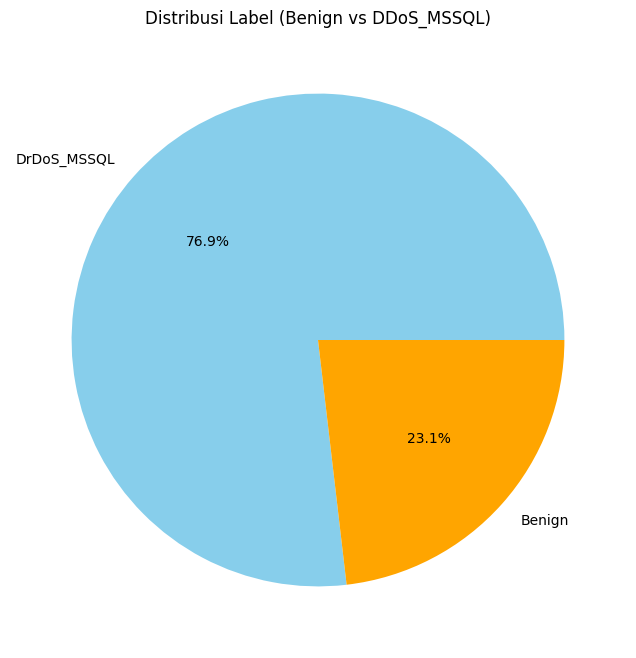

Deskripsi Distribusi Label:
DrDoS_MSSQL    6212
Benign         1871
Name: Label, dtype: int64


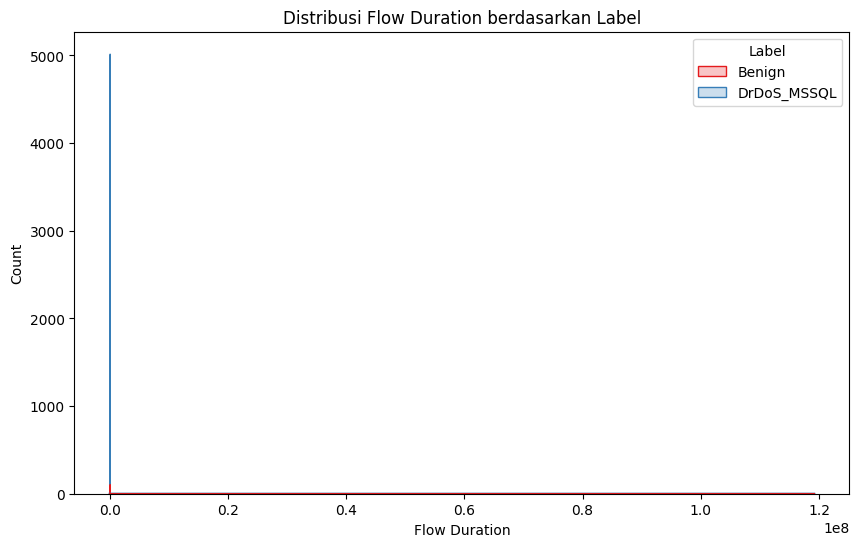


Deskripsi Flow Duration:
              count          mean           std  min      25%      50%  \
Label                                                                    
Benign       1871.0  5.005069e+06  1.960427e+07  1.0  20582.0  20744.0   
DrDoS_MSSQL  6212.0  1.251550e+04  3.089523e+05  1.0      1.0      1.0   

                  75%          max  
Label                               
Benign       250935.5  119169062.0  
DrDoS_MSSQL       2.0   11755118.0  


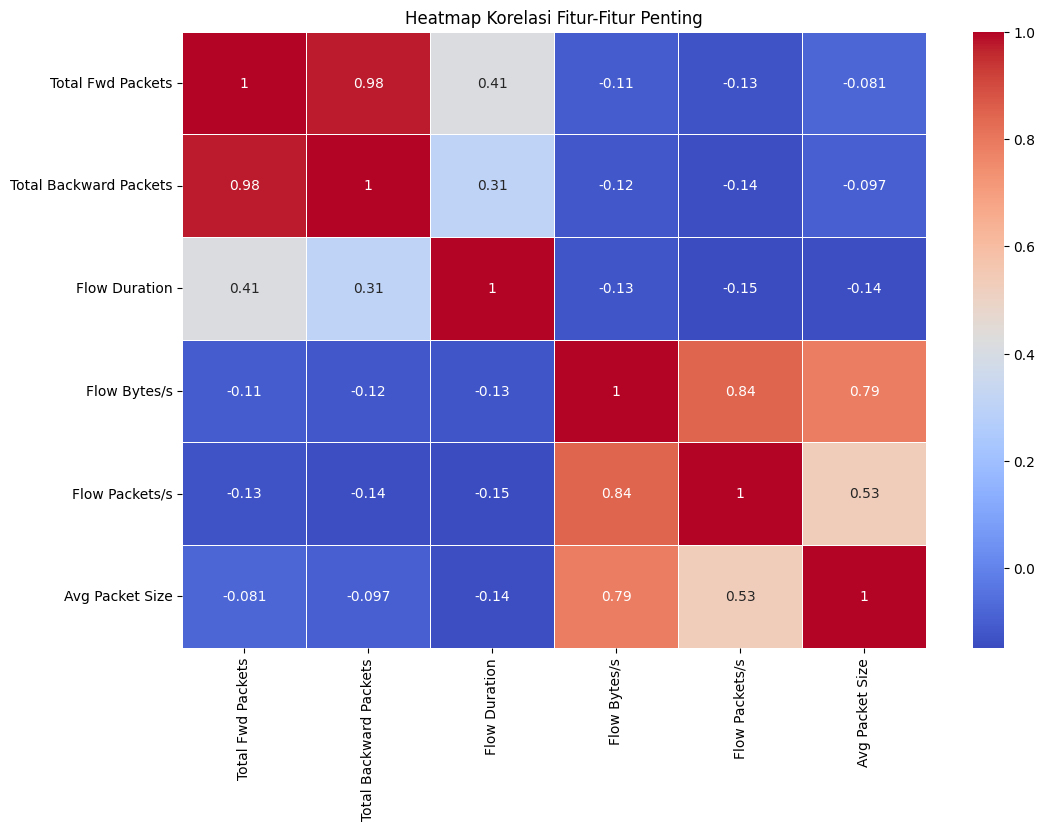


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.975494   
Total Backward Packets           0.975494                1.000000   
Flow Duration                    0.413110                0.308044   
Flow Bytes/s                    -0.107796               -0.120183   
Flow Packets/s                  -0.127002               -0.141981   
Avg Packet Size                 -0.080749               -0.096740   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.413110     -0.107796       -0.127002   
Total Backward Packets       0.308044     -0.120183       -0.141981   
Flow Duration                1.000000     -0.125401       -0.148310   
Flow Bytes/s                -0.125401      1.000000        0.843066   
Flow Packets/s              -0.148310      0.843066        1.000000   
Avg Packet Size             -0.140523      0.785197        0.52

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3928519065.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_MySQL_Testing, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3928519065.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_MySQL_Testing, palette="Set2")


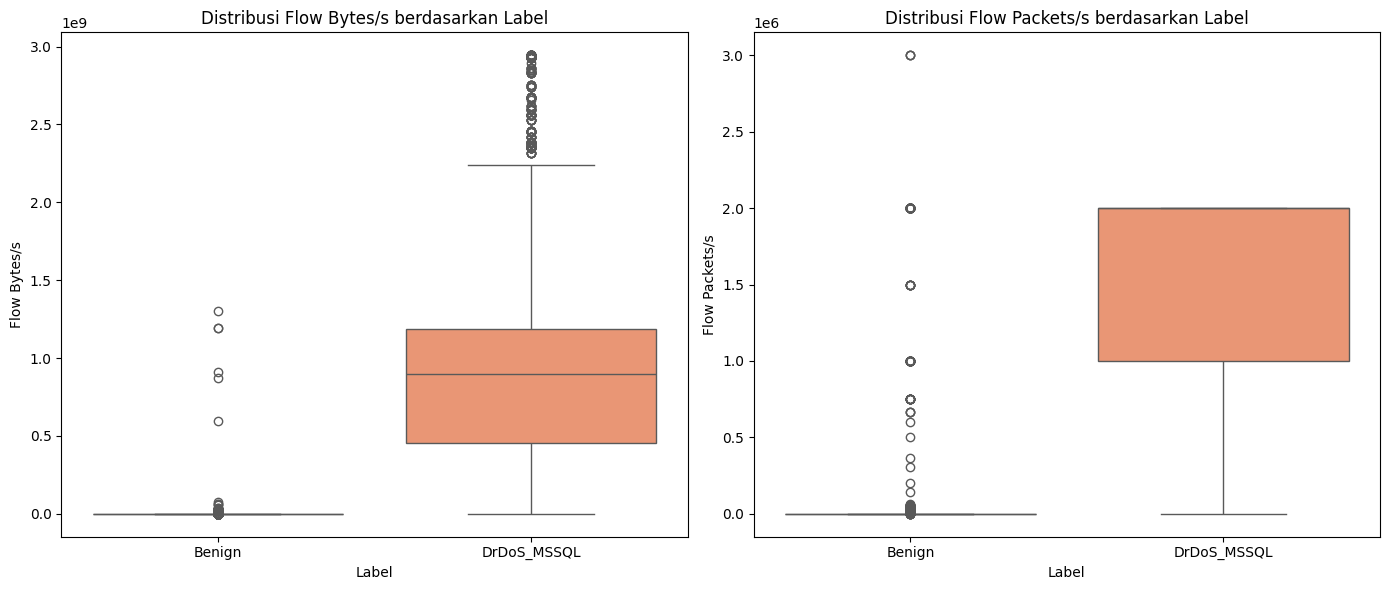


Deskripsi Flow Bytes/s dan Flow Packets/s:
            Flow Bytes/s                                                 \
                   count          mean           std  min           25%   
Label                                                                     
Benign            1871.0  3.829317e+06  5.889704e+07  0.0  0.000000e+00   
DrDoS_MSSQL       6212.0  8.801458e+08  6.129515e+08  0.0  4.569167e+08   

                                                      Flow Packets/s  \
                      50%           75%           max          count   
Label                                                                  
Benign       5.417187e+03  1.270365e+04  1.299000e+09         1871.0   
DrDoS_MSSQL  8.980000e+08  1.188500e+09  2.944000e+09         6212.0   

                                                                    \
                     mean            std       min             25%   
Label                                                                
Benign   

In [10]:
# Visualisasi distribusi label (Benign vs DDoS_MSSQL)
plt.figure(figsize=(8, 8))
df_MySQL_Testing["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label (Benign vs DDoS_MySQL)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")y
label_counts = df_MySQL_Testing["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_MySQL_Testing, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_MySQL_Testing.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_MySQL_Testing[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_MySQL_Testing[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_MySQL_Testing, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_MySQL_Testing, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_MySQL_Testing.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [11]:
# membaca Dataset MySQL Training
df_MySQL_Training = pd.read_parquet("C:\Data Raihan\Penelitian Threshold\Dataset\CIC-DDoS2019\MSSQL-training.parquet")
df_MySQL_Training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10974 entries, 0 to 10973
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  10974 non-null  int8    
 1   Flow Duration             10974 non-null  int32   
 2   Total Fwd Packets         10974 non-null  int16   
 3   Total Backward Packets    10974 non-null  int16   
 4   Fwd Packets Length Total  10974 non-null  float32 
 5   Bwd Packets Length Total  10974 non-null  float32 
 6   Fwd Packet Length Max     10974 non-null  float32 
 7   Fwd Packet Length Min     10974 non-null  float32 
 8   Fwd Packet Length Mean    10974 non-null  float32 
 9   Fwd Packet Length Std     10974 non-null  float32 
 10  Bwd Packet Length Max     10974 non-null  float32 
 11  Bwd Packet Length Min     10974 non-null  float32 
 12  Bwd Packet Length Mean    10974 non-null  float32 
 13  Bwd Packet Length Std     10974 non-null  floa

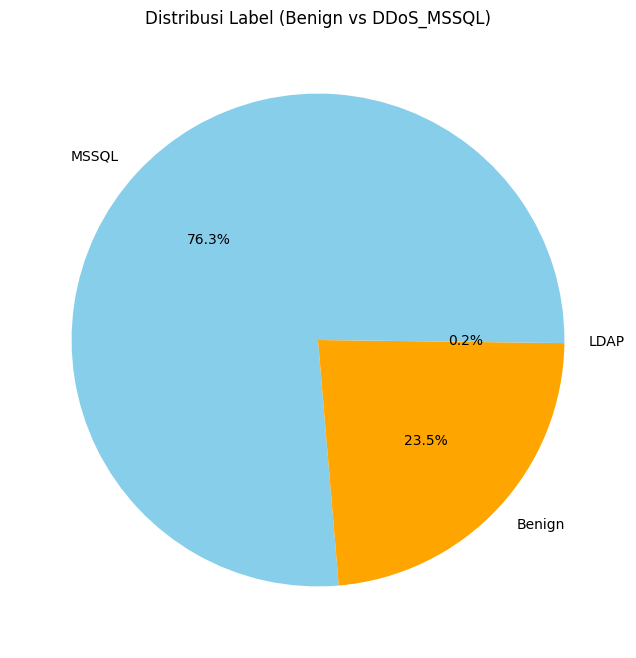

Deskripsi Distribusi Label:
MSSQL     8378
Benign    2574
LDAP        22
Name: Label, dtype: int64


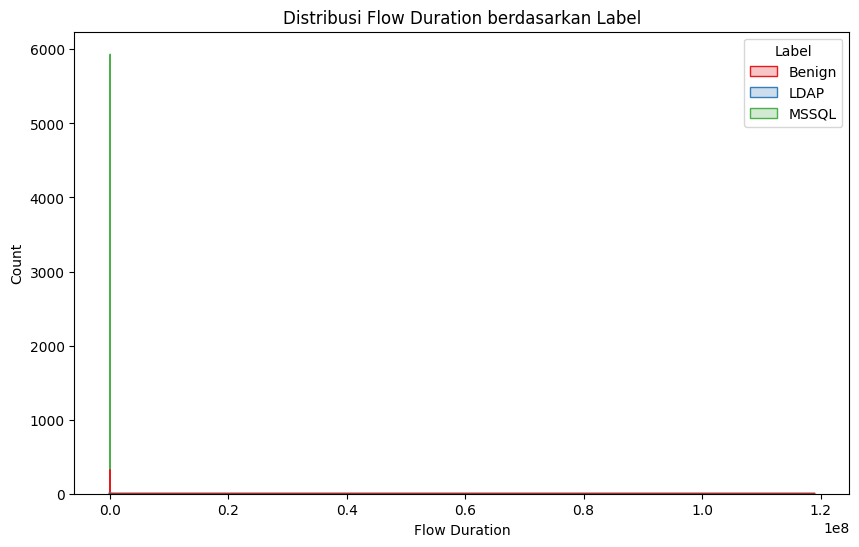


Deskripsi Flow Duration:
         count          mean           std  min     25%      50%       75%  \
Label                                                                        
Benign  2574.0  4.120573e+06  1.567441e+07  1.0  1763.5  41263.0  230141.0   
LDAP      22.0  3.727273e+00  1.057032e+01  1.0     1.0      1.5       2.0   
MSSQL   8378.0  1.100989e+04  2.797379e+05  1.0     1.0      1.0      46.0   

                max  
Label                
Benign  118926815.0  
LDAP           51.0  
MSSQL    12356358.0  


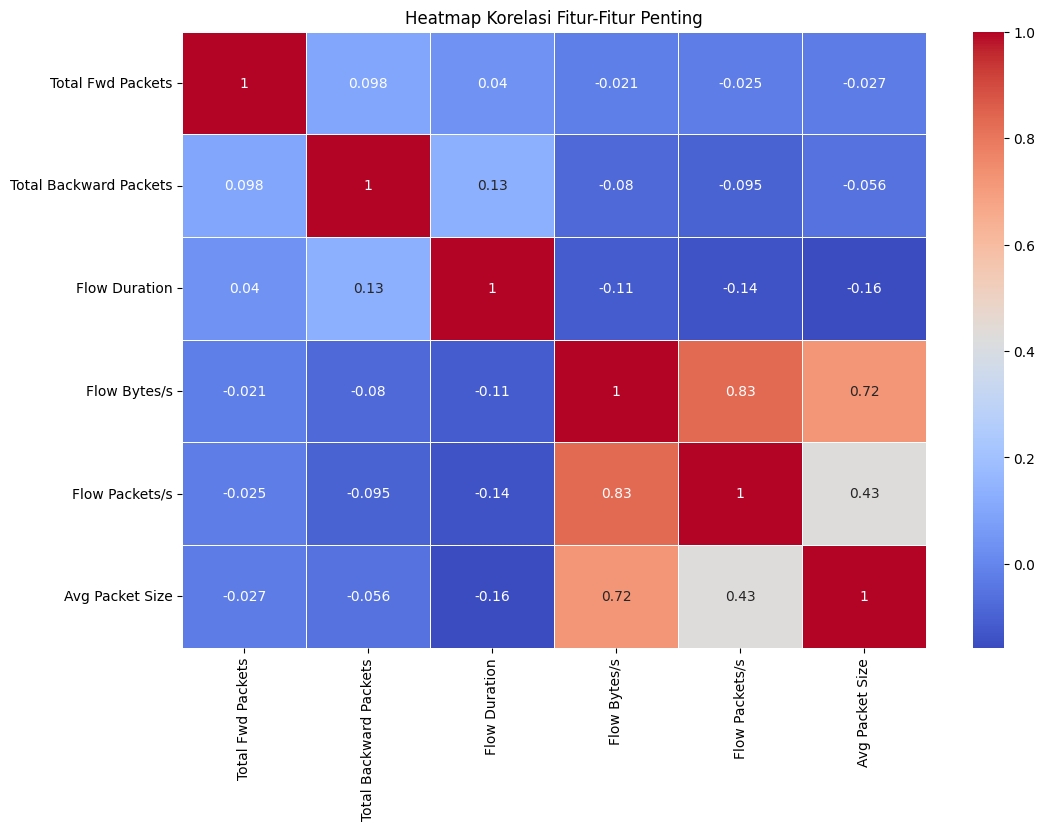


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.098263   
Total Backward Packets           0.098263                1.000000   
Flow Duration                    0.039891                0.127663   
Flow Bytes/s                    -0.021271               -0.079988   
Flow Packets/s                  -0.025343               -0.095395   
Avg Packet Size                 -0.026928               -0.055815   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.039891     -0.021271       -0.025343   
Total Backward Packets       0.127663     -0.079988       -0.095395   
Flow Duration                1.000000     -0.114587       -0.136955   
Flow Bytes/s                -0.114587      1.000000        0.834016   
Flow Packets/s              -0.136955      0.834016        1.000000   
Avg Packet Size             -0.157684      0.722486        0.42

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\1821747206.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_MySQL_Training, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\1821747206.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_MySQL_Training, palette="Set2")


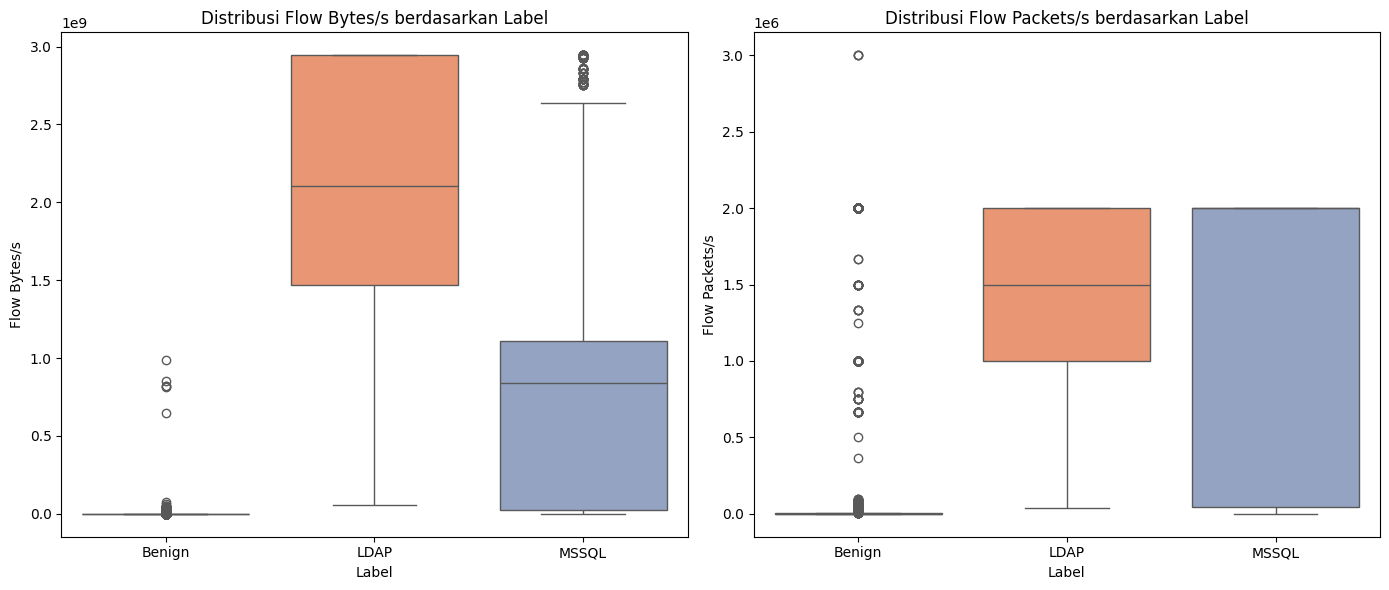


Deskripsi Flow Bytes/s dan Flow Packets/s:
       Flow Bytes/s                                                          \
              count          mean           std           min           25%   
Label                                                                         
Benign       2574.0  3.922556e+06  4.054308e+07  0.000000e+00  1.731692e+00   
LDAP           22.0  2.113533e+09  8.559170e+08  5.772549e+07  1.472000e+09   
MSSQL        8378.0  7.576224e+08  6.244938e+08  0.000000e+00  2.650000e+07   

                                                 Flow Packets/s                \
                 50%           75%           max          count          mean   
Label                                                                           
Benign  3.620513e+03  4.675319e+04  9.880000e+08         2574.0  2.068689e+05   
LDAP    2.104000e+09  2.944000e+09  2.944000e+09           22.0  1.456328e+06   
MSSQL   8.390000e+08  1.110000e+09  2.944000e+09         8378.0  1.237994e+0

In [12]:
# Visualisasi distribusi label (Benign vs DDoS_MSSQL)
plt.figure(figsize=(8, 8))
df_MySQL_Training["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label (Benign vs DDoS_MSSQL)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")
label_counts = df_MySQL_Training["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_MySQL_Training, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_MySQL_Training.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_MySQL_Training[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_MySQL_Training[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_MySQL_Training, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_MySQL_Training, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_MySQL_Training.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [13]:
# membaca Dataset NetBIOS Testing
df_NetBios_Testing = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019\\NetBIOS-testing.parquet")
df_NetBios_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  2225 non-null   int8    
 1   Flow Duration             2225 non-null   int32   
 2   Total Fwd Packets         2225 non-null   int16   
 3   Total Backward Packets    2225 non-null   int16   
 4   Fwd Packets Length Total  2225 non-null   float32 
 5   Bwd Packets Length Total  2225 non-null   float32 
 6   Fwd Packet Length Max     2225 non-null   float32 
 7   Fwd Packet Length Min     2225 non-null   float32 
 8   Fwd Packet Length Mean    2225 non-null   float32 
 9   Fwd Packet Length Std     2225 non-null   float32 
 10  Bwd Packet Length Max     2225 non-null   float32 
 11  Bwd Packet Length Min     2225 non-null   float32 
 12  Bwd Packet Length Mean    2225 non-null   float32 
 13  Bwd Packet Length Std     2225 non-null   float3

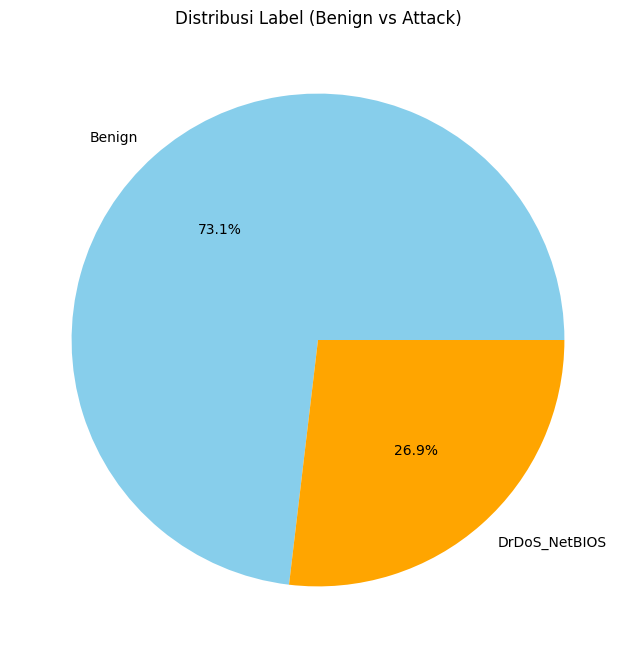

Deskripsi Distribusi Label:
Benign           1627
DrDoS_NetBIOS     598
Name: Label, dtype: int64


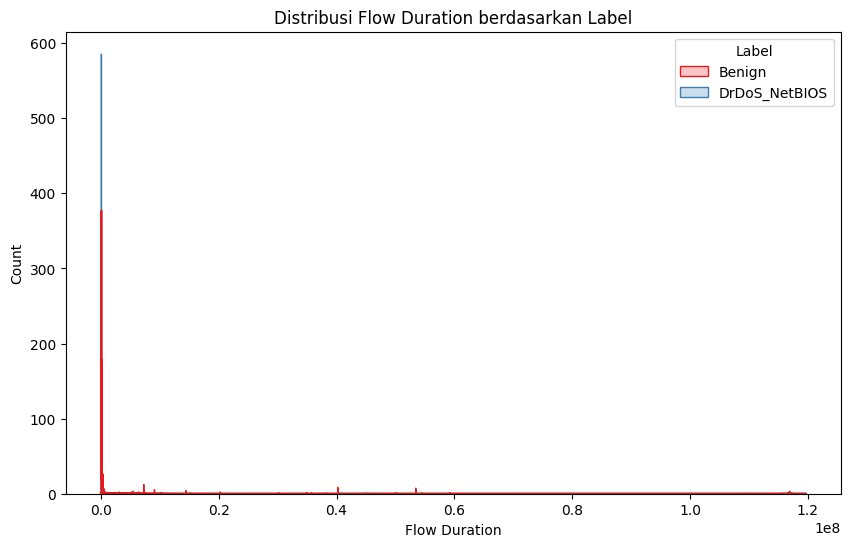


Deskripsi Flow Duration:
                count          mean           std  min      25%      50%  \
Label                                                                      
Benign         1627.0  7.269221e+06  2.259756e+07  1.0  20558.5  44642.0   
DrDoS_NetBIOS   598.0  8.537792e+05  6.213617e+06  1.0      1.0      2.0   

                    75%          max  
Label                                 
Benign         224569.5  119601921.0  
DrDoS_NetBIOS      48.0   49948396.0  


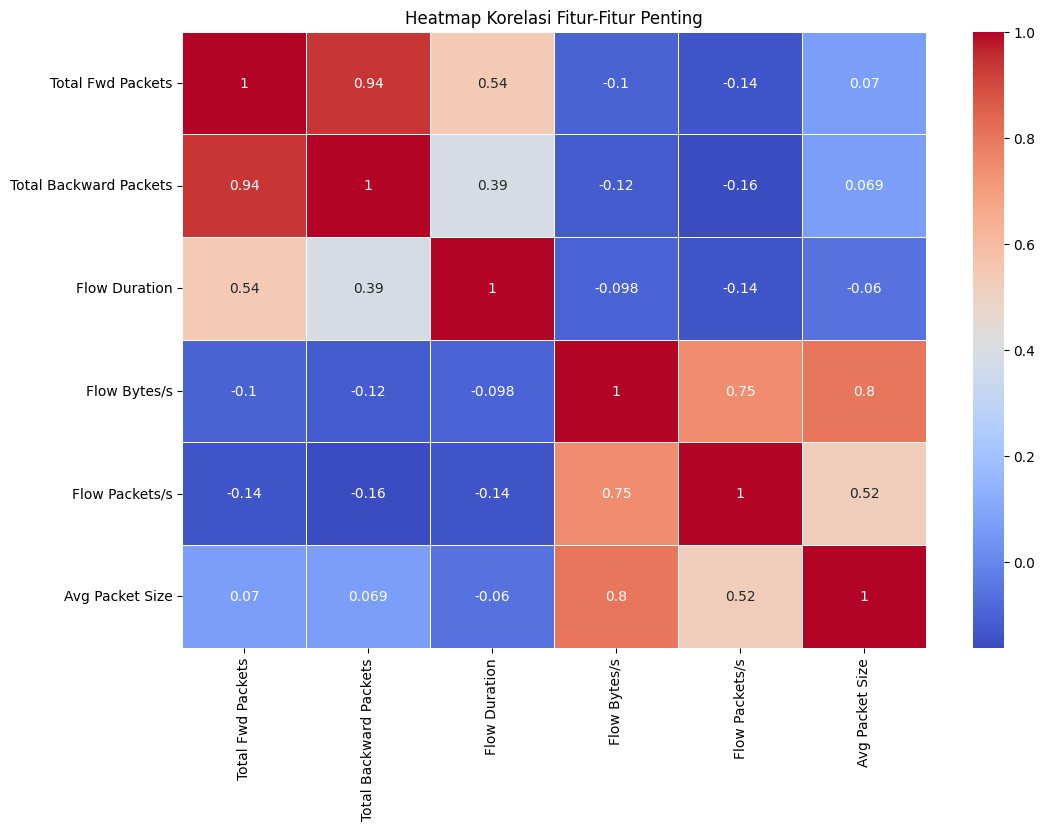


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.939709   
Total Backward Packets           0.939709                1.000000   
Flow Duration                    0.538506                0.390368   
Flow Bytes/s                    -0.102566               -0.118494   
Flow Packets/s                  -0.138273               -0.162515   
Avg Packet Size                  0.069606                0.069105   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.538506     -0.102566       -0.138273   
Total Backward Packets       0.390368     -0.118494       -0.162515   
Flow Duration                1.000000     -0.098492       -0.135422   
Flow Bytes/s                -0.098492      1.000000        0.745557   
Flow Packets/s              -0.135422      0.745557        1.000000   
Avg Packet Size             -0.059736      0.803022        0.52

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\1869894502.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_NetBios_Testing, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\1869894502.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_NetBios_Testing, palette="Set2")


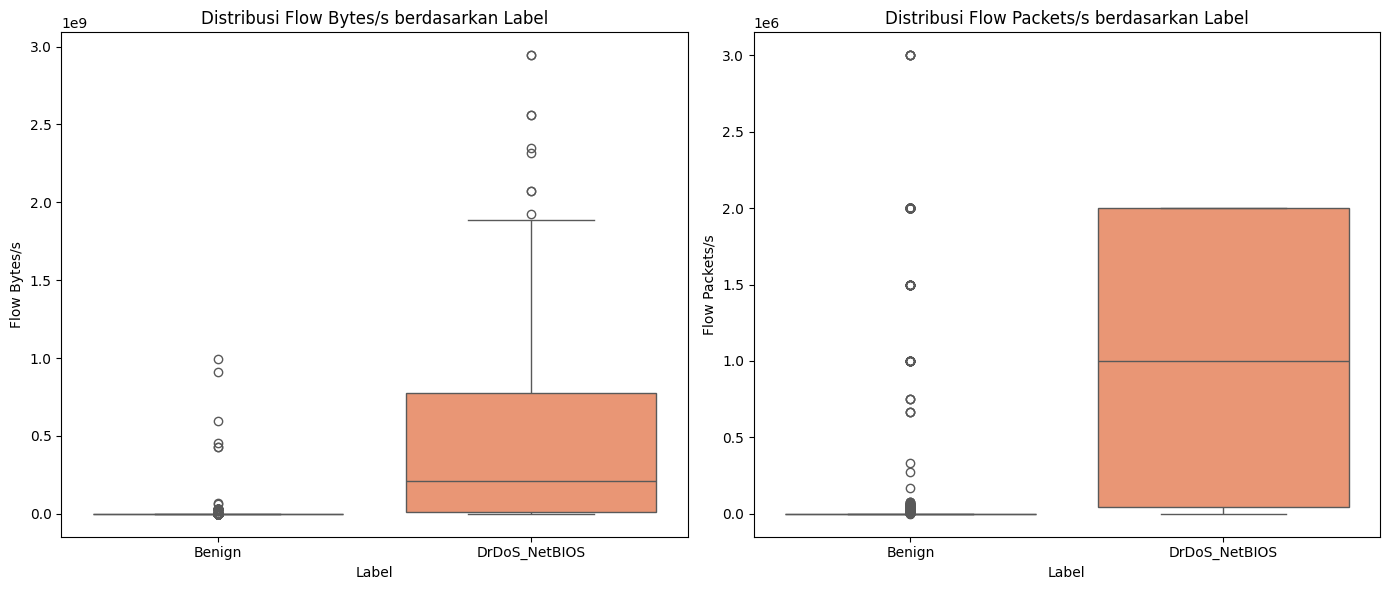


Deskripsi Flow Bytes/s dan Flow Packets/s:
              Flow Bytes/s                                                 \
                     count          mean           std  min           25%   
Label                                                                       
Benign              1627.0  3.157742e+06  4.135764e+07  0.0  0.000000e+00   
DrDoS_NetBIOS        598.0  3.997113e+08  4.933519e+08  0.0  9.761999e+06   

                                                        Flow Packets/s  \
                        50%           75%           max          count   
Label                                                                    
Benign         3.360356e+03  1.122454e+04  9.960000e+08         1627.0   
DrDoS_NetBIOS  2.115000e+08  7.730000e+08  2.944000e+09          598.0   

                                                                     \
                        mean            std       min           25%   
Label                                                    

In [14]:
# Visualisasi distribusi label (Benign vs Attack)
plt.figure(figsize=(8, 8))
df_NetBios_Testing["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label (Benign vs Attack)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")
label_counts = df_NetBios_Testing["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_NetBios_Testing, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_NetBios_Testing.groupby("Label")["Flow Duration"].describe())

# Memilih fitur-fitur penting untuk dianalisis
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]

# Visualisasi heatmap korelasi antara fitur-fitur penting
plt.figure(figsize=(12, 8))
sns.heatmap(df_NetBios_Testing[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_NetBios_Testing[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_NetBios_Testing, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_NetBios_Testing, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_NetBios_Testing.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [15]:
# membaca Dataset NetBIOS Training
df_NetBios_Training = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019\\NetBIOS-training.parquet")
df_NetBios_Training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  1631 non-null   int8    
 1   Flow Duration             1631 non-null   int32   
 2   Total Fwd Packets         1631 non-null   int16   
 3   Total Backward Packets    1631 non-null   int16   
 4   Fwd Packets Length Total  1631 non-null   float32 
 5   Bwd Packets Length Total  1631 non-null   float32 
 6   Fwd Packet Length Max     1631 non-null   float32 
 7   Fwd Packet Length Min     1631 non-null   float32 
 8   Fwd Packet Length Mean    1631 non-null   float32 
 9   Fwd Packet Length Std     1631 non-null   float32 
 10  Bwd Packet Length Max     1631 non-null   float32 
 11  Bwd Packet Length Min     1631 non-null   float32 
 12  Bwd Packet Length Mean    1631 non-null   float32 
 13  Bwd Packet Length Std     1631 non-null   float3

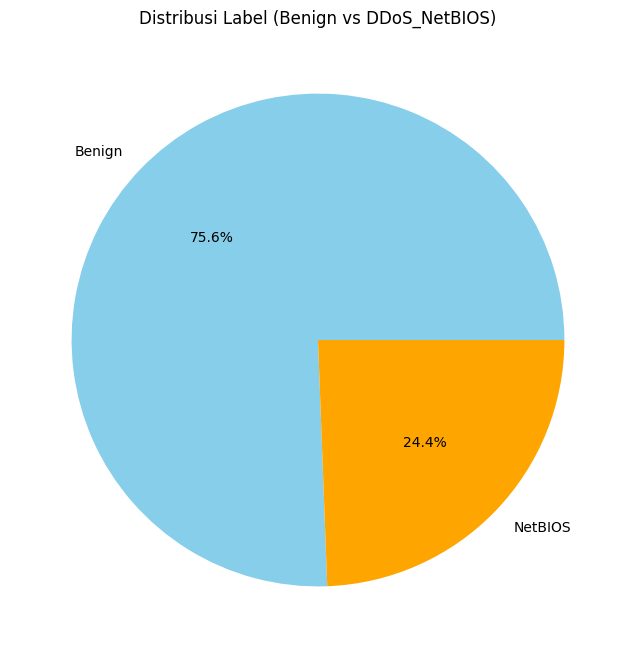

Deskripsi Distribusi Label:
Benign     1233
NetBIOS     398
Name: Label, dtype: int64


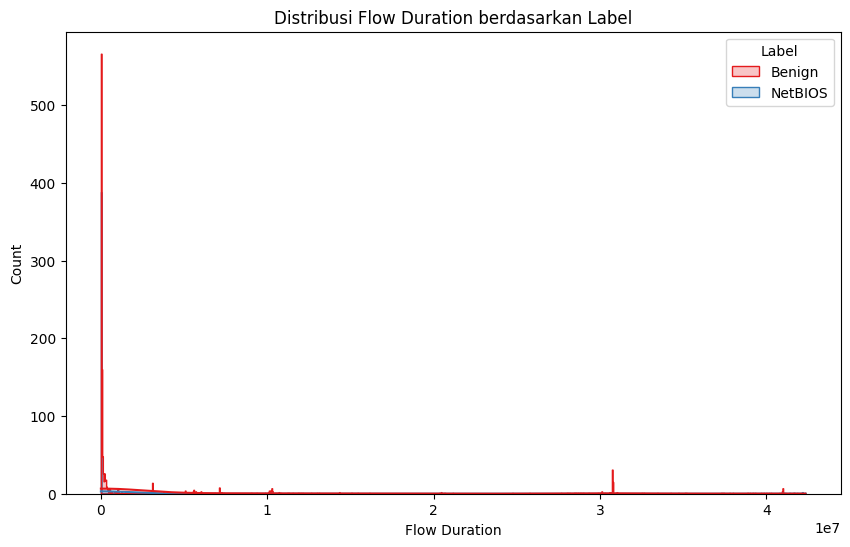


Deskripsi Flow Duration:
          count          mean           std  min      25%      50%       75%  \
Label                                                                          
Benign   1233.0  4.116378e+06  9.766648e+06  1.0  20827.0  47507.0  769457.0   
NetBIOS   398.0  1.049950e+06  6.548196e+06  1.0      2.0     46.0      49.0   

                max  
Label                
Benign   41656557.0  
NetBIOS  42344267.0  


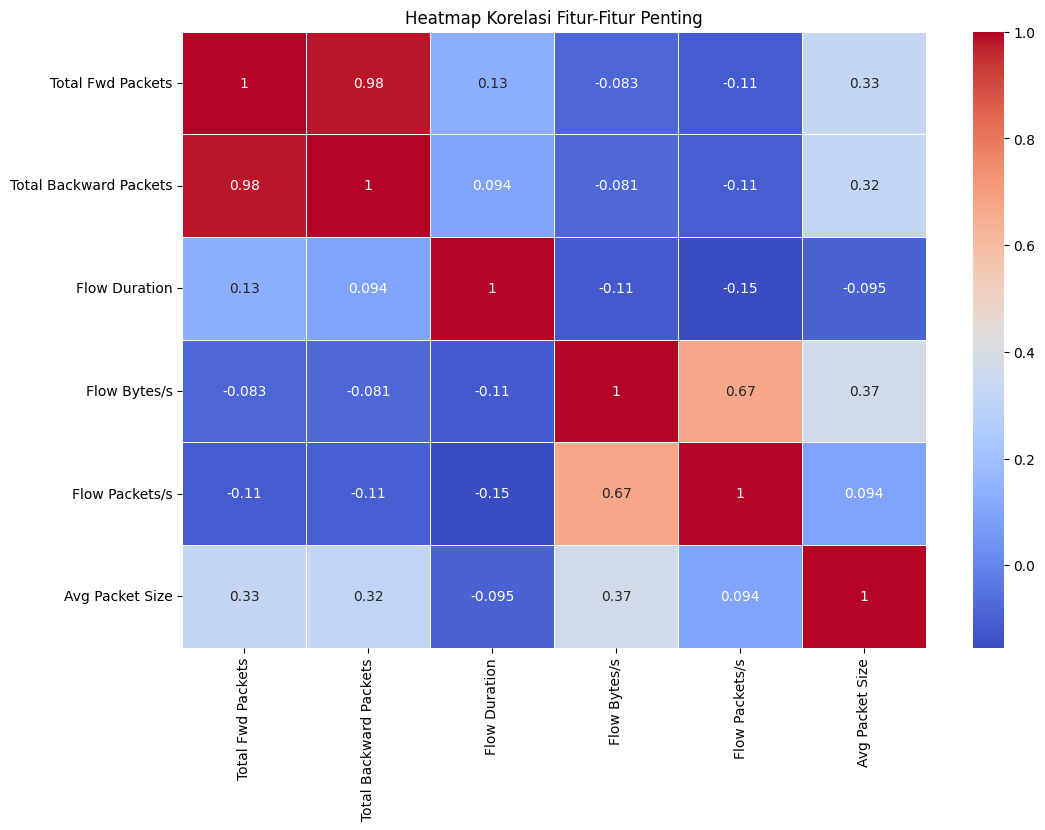


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.978310   
Total Backward Packets           0.978310                1.000000   
Flow Duration                    0.133996                0.093862   
Flow Bytes/s                    -0.083143               -0.081315   
Flow Packets/s                  -0.110443               -0.109612   
Avg Packet Size                  0.327040                0.315939   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.133996     -0.083143       -0.110443   
Total Backward Packets       0.093862     -0.081315       -0.109612   
Flow Duration                1.000000     -0.114684       -0.154753   
Flow Bytes/s                -0.114684      1.000000        0.671816   
Flow Packets/s              -0.154753      0.671816        1.000000   
Avg Packet Size             -0.094765      0.371236        0.09

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\437825368.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_NetBios_Training, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\437825368.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_NetBios_Training, palette="Set2")


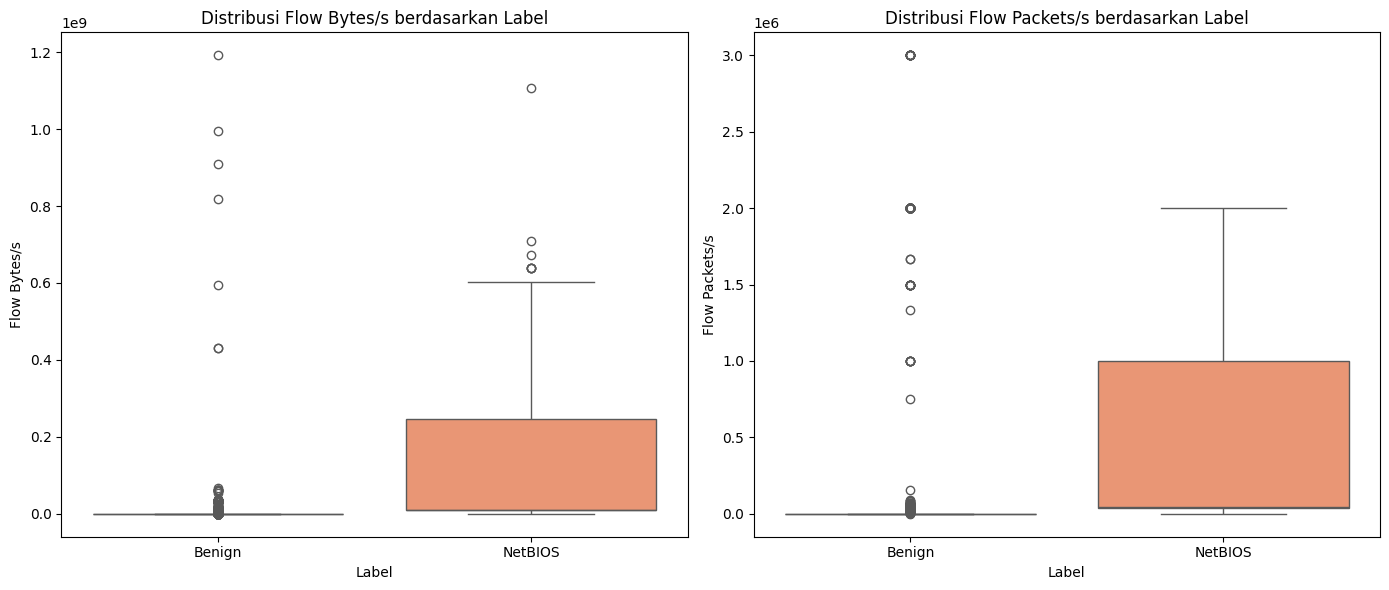


Deskripsi Flow Bytes/s dan Flow Packets/s:
        Flow Bytes/s                                                       \
               count          mean           std        min           25%   
Label                                                                       
Benign        1233.0  6.354584e+06  6.159387e+07   0.000000  5.298692e+02   
NetBIOS        398.0  1.405590e+08  1.972356e+08  20.914586  9.021277e+06   

                                                  Flow Packets/s  \
                  50%           75%           max          count   
Label                                                              
Benign   8.491413e+03  5.744099e+04  1.192000e+09         1233.0   
NetBIOS  1.062558e+07  2.470000e+08  1.106000e+09          398.0   

                                                                             \
                  mean            std       min           25%           50%   
Label                                                                  

In [16]:
# Visualisasi distribusi label (Benign vs DDoS_NetBIOS)
plt.figure(figsize=(8, 8))
df_NetBios_Training["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label (Benign vs DDoS_NetBIOS)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")
label_counts = df_NetBios_Training["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_NetBios_Training, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_NetBios_Training.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_NetBios_Training[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_NetBios_Training[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_NetBios_Training, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_NetBios_Training, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_NetBios_Training.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [17]:
# membaca Dataset NTP testing
df_NTP_Testing = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019\\NTP-testing.parquet")
df_NTP_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134674 entries, 0 to 134673
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Protocol                  134674 non-null  int8    
 1   Flow Duration             134674 non-null  int32   
 2   Total Fwd Packets         134674 non-null  int16   
 3   Total Backward Packets    134674 non-null  int16   
 4   Fwd Packets Length Total  134674 non-null  float32 
 5   Bwd Packets Length Total  134674 non-null  float32 
 6   Fwd Packet Length Max     134674 non-null  float32 
 7   Fwd Packet Length Min     134674 non-null  float32 
 8   Fwd Packet Length Mean    134674 non-null  float32 
 9   Fwd Packet Length Std     134674 non-null  float32 
 10  Bwd Packet Length Max     134674 non-null  float32 
 11  Bwd Packet Length Min     134674 non-null  float32 
 12  Bwd Packet Length Mean    134674 non-null  float32 
 13  Bwd Packet Length Std     134

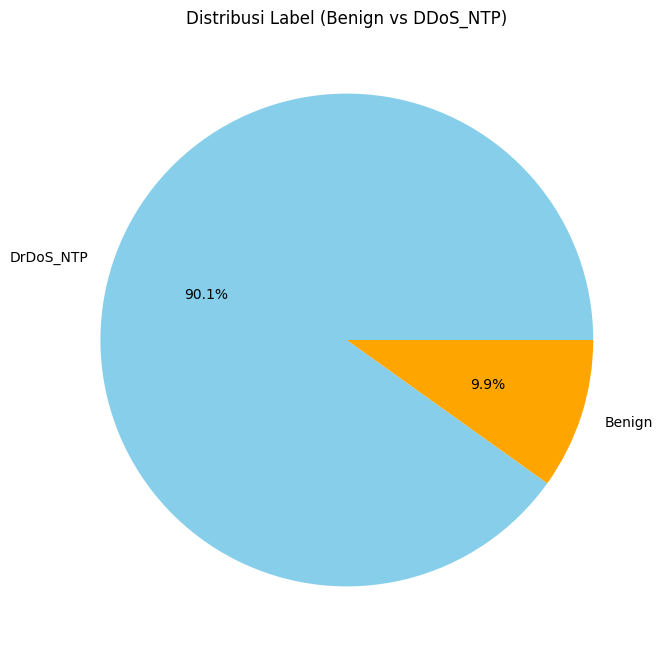

Deskripsi Distribusi Label:
DrDoS_NTP    121368
Benign        13306
Name: Label, dtype: int64


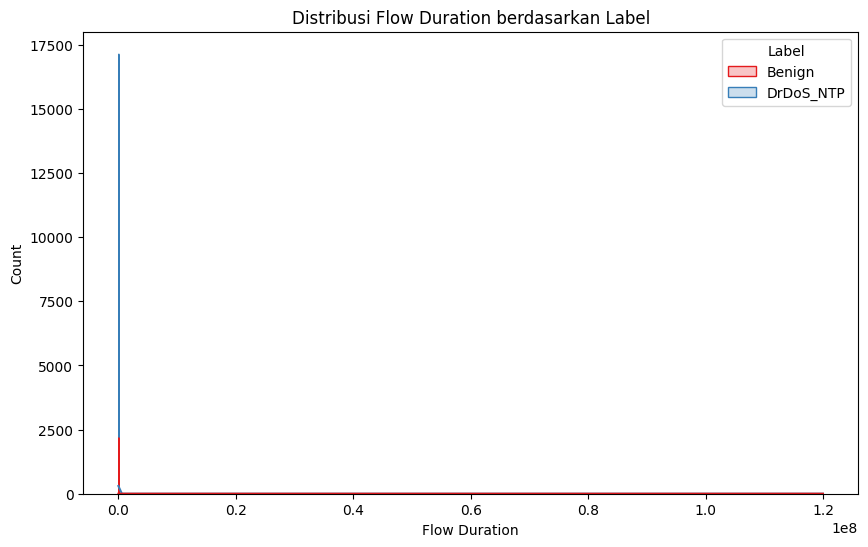


Deskripsi Flow Duration:
              count          mean           std  min      25%      50%  \
Label                                                                    
Benign      13306.0  1.061867e+07  3.079438e+07  1.0  20567.0  20855.0   
DrDoS_NTP  121368.0  1.556352e+04  3.746257e+05  1.0    438.0   1097.5   

                75%          max  
Label                             
Benign     100748.5  119995906.0  
DrDoS_NTP    4551.0   58798083.0  


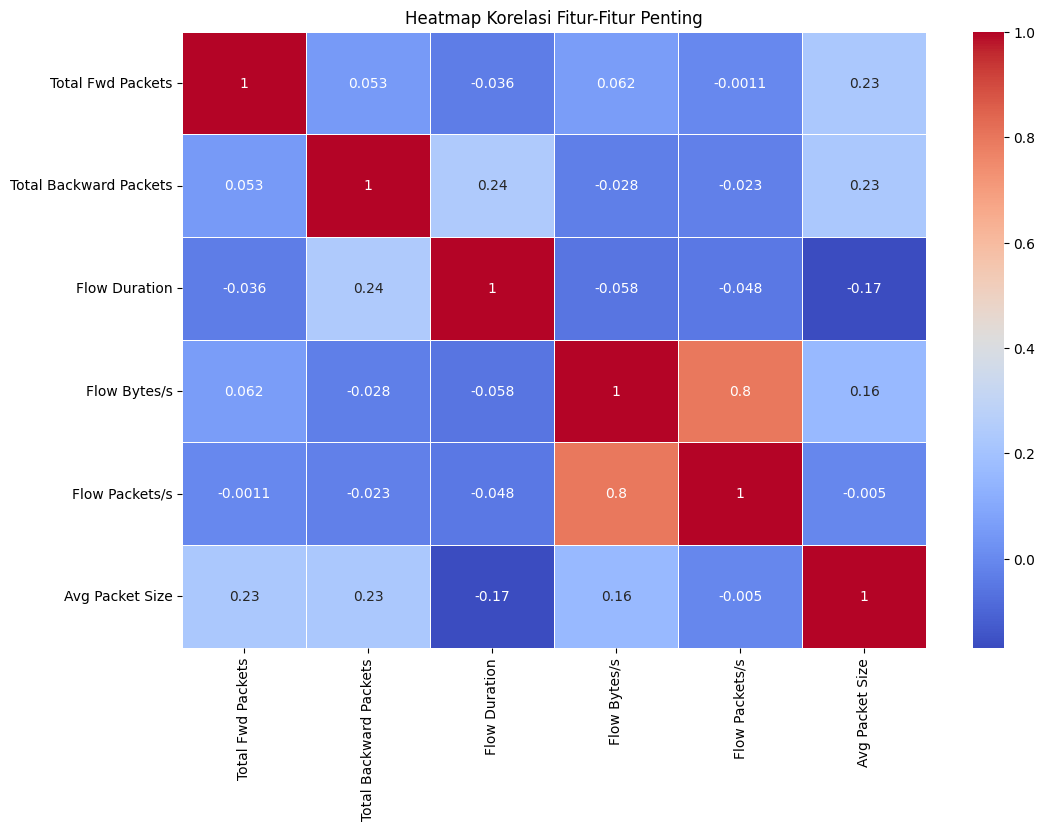


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.052738   
Total Backward Packets           0.052738                1.000000   
Flow Duration                   -0.035754                0.240937   
Flow Bytes/s                     0.061677               -0.027545   
Flow Packets/s                  -0.001129               -0.022806   
Avg Packet Size                  0.225976                0.227344   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets           -0.035754      0.061677       -0.001129   
Total Backward Packets       0.240937     -0.027545       -0.022806   
Flow Duration                1.000000     -0.057716       -0.048454   
Flow Bytes/s                -0.057716      1.000000        0.798655   
Flow Packets/s              -0.048454      0.798655        1.000000   
Avg Packet Size             -0.168794      0.160899       -0.00

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3192428884.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_NTP_Testing, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3192428884.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_NTP_Testing, palette="Set2")


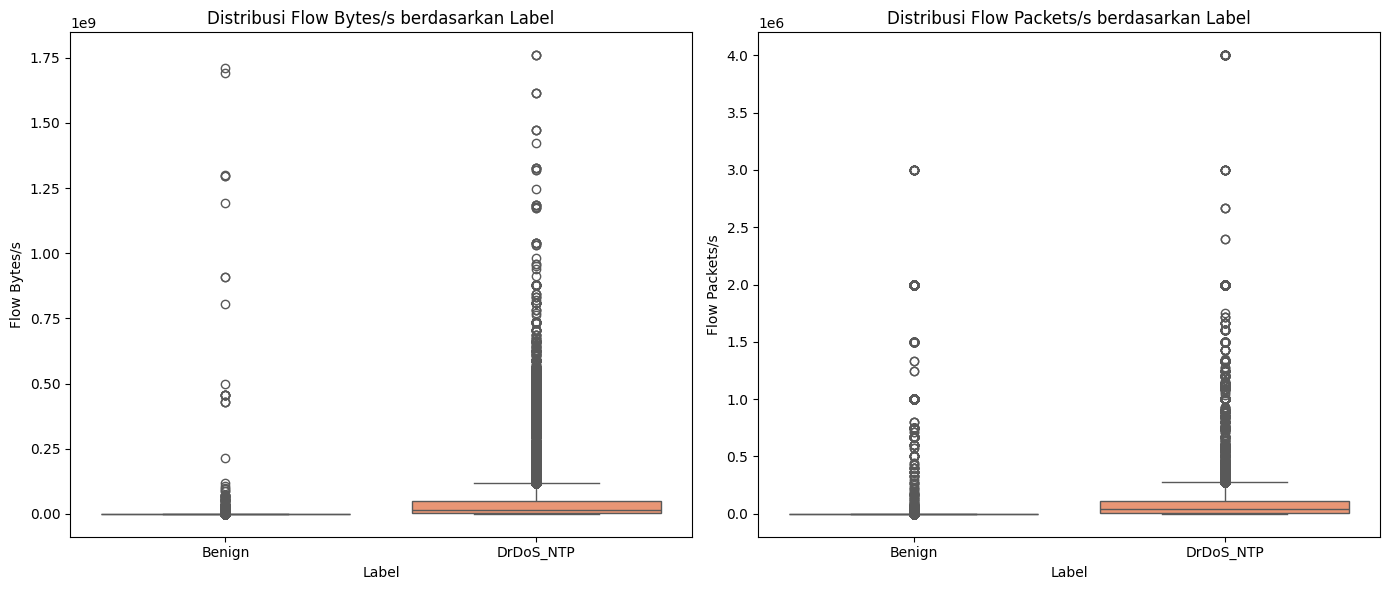


Deskripsi Flow Bytes/s dan Flow Packets/s:
          Flow Bytes/s                                                 \
                 count          mean           std  min           25%   
Label                                                                   
Benign         13306.0  1.725373e+06  3.563881e+07  0.0  0.000000e+00   
DrDoS_NTP     121368.0  3.350181e+07  5.566365e+07  0.0  4.347550e+06   

                                                    Flow Packets/s  \
                    50%           75%           max          count   
Label                                                                
Benign     4.462504e+03  1.298607e+04  1.713000e+09        13306.0   
DrDoS_NTP  1.643966e+07  4.990099e+07  1.760000e+09       121368.0   

                                                                              \
                   mean            std       min           25%           50%   
Label                                                                          

In [18]:
# Visualisasi distribusi label (Benign vs DDoS_NTP)
plt.figure(figsize=(8, 8))
df_NTP_Testing["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label (Benign vs DDoS_NTP)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")
label_counts = df_NTP_Testing["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_NTP_Testing, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_NTP_Testing.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_NTP_Testing[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_NTP_Testing[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_NTP_Testing, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_NTP_Testing, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_NTP_Testing.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [19]:
# membaca Dataset Portmap Training
df_Portmap_Training = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019\\Portmap-training.parquet")
df_Portmap_Training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  5105 non-null   int8    
 1   Flow Duration             5105 non-null   int32   
 2   Total Fwd Packets         5105 non-null   int16   
 3   Total Backward Packets    5105 non-null   int16   
 4   Fwd Packets Length Total  5105 non-null   float32 
 5   Bwd Packets Length Total  5105 non-null   float32 
 6   Fwd Packet Length Max     5105 non-null   float32 
 7   Fwd Packet Length Min     5105 non-null   float32 
 8   Fwd Packet Length Mean    5105 non-null   float32 
 9   Fwd Packet Length Std     5105 non-null   float32 
 10  Bwd Packet Length Max     5105 non-null   float32 
 11  Bwd Packet Length Min     5105 non-null   float32 
 12  Bwd Packet Length Mean    5105 non-null   float32 
 13  Bwd Packet Length Std     5105 non-null   float3

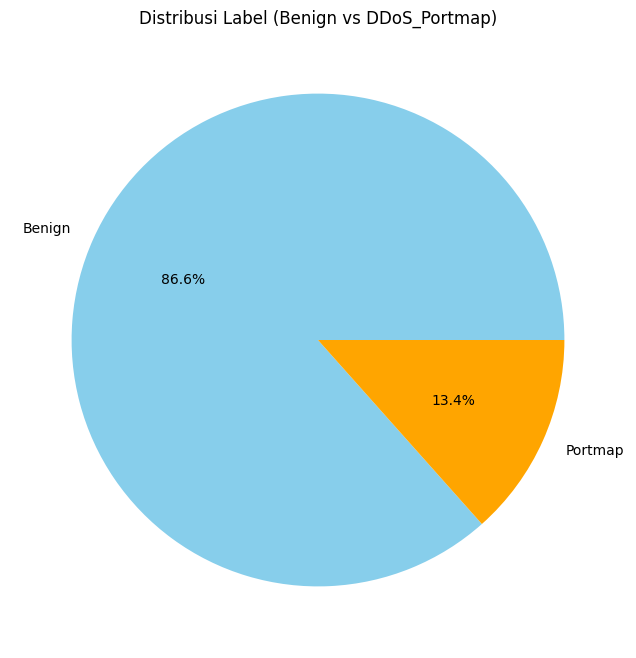

Deskripsi Distribusi Label:
Benign     4420
Portmap     685
Name: Label, dtype: int64


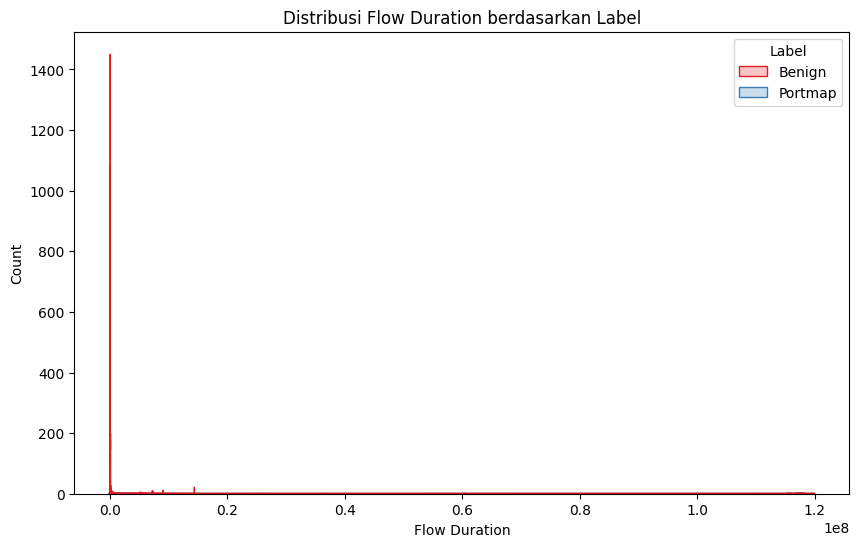


Deskripsi Flow Duration:
          count          mean           std  min       25%      50%  \
Label                                                                 
Benign   4420.0  1.410113e+07  3.568422e+07  1.0  20584.75  21088.0   
Portmap   685.0  1.529611e+06  1.197450e+07  1.0      6.00     48.0   

               75%          max  
Label                            
Benign   112444.25  119909914.0  
Portmap      79.00  119566390.0  


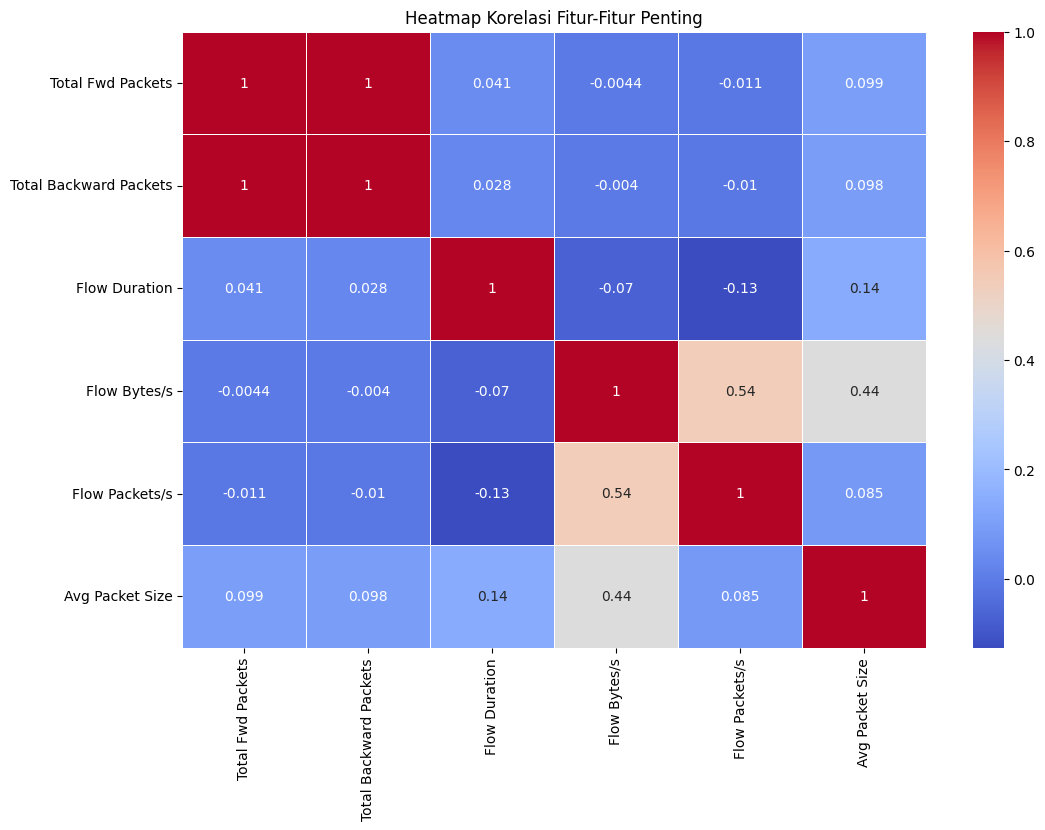


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.999759   
Total Backward Packets           0.999759                1.000000   
Flow Duration                    0.041406                0.028119   
Flow Bytes/s                    -0.004393               -0.003987   
Flow Packets/s                  -0.011059               -0.010270   
Avg Packet Size                  0.099138                0.097824   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.041406     -0.004393       -0.011059   
Total Backward Packets       0.028119     -0.003987       -0.010270   
Flow Duration                1.000000     -0.070477       -0.125946   
Flow Bytes/s                -0.070477      1.000000        0.539621   
Flow Packets/s              -0.125946      0.539621        1.000000   
Avg Packet Size              0.139895      0.440452        0.08

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3698624532.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_Portmap_Training, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3698624532.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_Portmap_Training, palette="Set2")


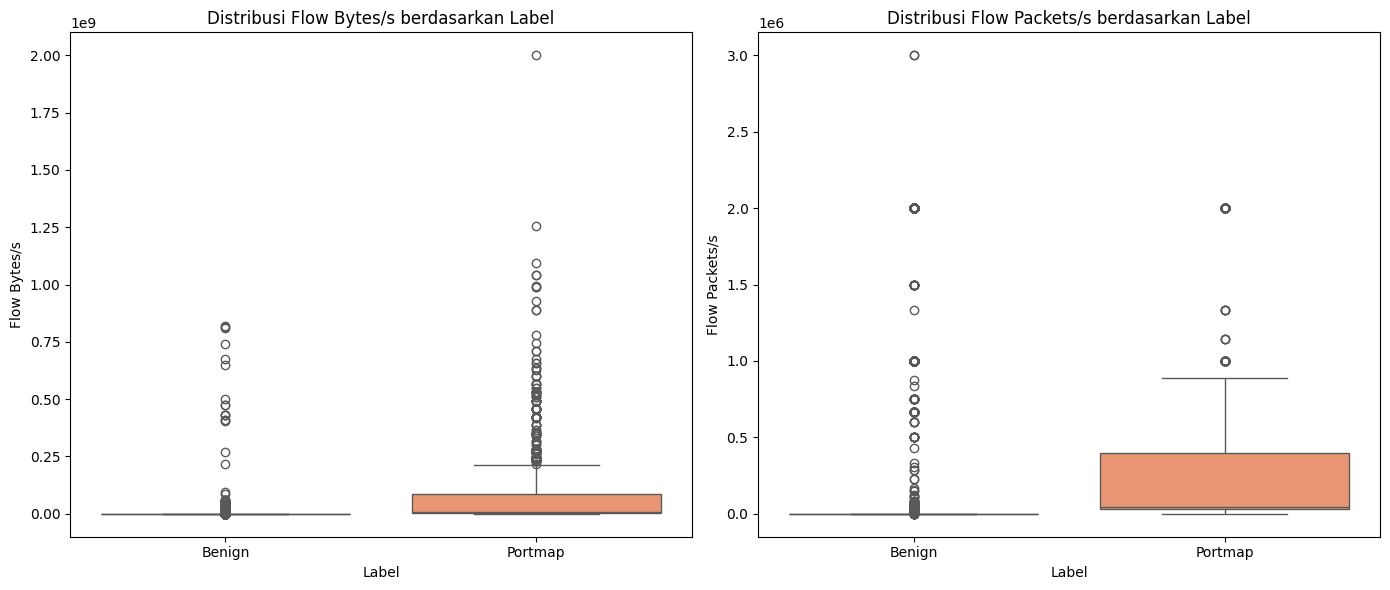


Deskripsi Flow Bytes/s dan Flow Packets/s:
        Flow Bytes/s                                                 \
               count          mean           std  min           25%   
Label                                                                 
Benign        4420.0  3.578122e+06  3.514356e+07  0.0  3.535692e+02   
Portmap        685.0  1.063555e+08  2.101048e+08  0.0  5.552632e+06   

                                                  Flow Packets/s  \
                  50%           75%           max          count   
Label                                                              
Benign   9.776436e+03  3.033087e+04  8.180000e+08         4420.0   
Portmap  9.956522e+06  8.833333e+07  2.000000e+09          685.0   

                                                                             \
                  mean            std       min           25%           50%   
Label                                                                         
Benign   127561.231091

In [20]:
# Visualisasi distribusi label (Benign vs DDoS_Portmap)
plt.figure(figsize=(8, 8))
df_Portmap_Training["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label (Benign vs DDoS_Portmap)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")
label_counts = df_Portmap_Training["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_Portmap_Training, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_Portmap_Training.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_Portmap_Training[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_Portmap_Training[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_Portmap_Training, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_Portmap_Training, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_Portmap_Training.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [21]:
# membaca Dataset SNMP Testing
df_SNMP_Testing = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019\\SNMP-testing.parquet")
df_SNMP_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  4018 non-null   int8    
 1   Flow Duration             4018 non-null   int32   
 2   Total Fwd Packets         4018 non-null   int16   
 3   Total Backward Packets    4018 non-null   int16   
 4   Fwd Packets Length Total  4018 non-null   float32 
 5   Bwd Packets Length Total  4018 non-null   float32 
 6   Fwd Packet Length Max     4018 non-null   float32 
 7   Fwd Packet Length Min     4018 non-null   float32 
 8   Fwd Packet Length Mean    4018 non-null   float32 
 9   Fwd Packet Length Std     4018 non-null   float32 
 10  Bwd Packet Length Max     4018 non-null   float32 
 11  Bwd Packet Length Min     4018 non-null   float32 
 12  Bwd Packet Length Mean    4018 non-null   float32 
 13  Bwd Packet Length Std     4018 non-null   float3

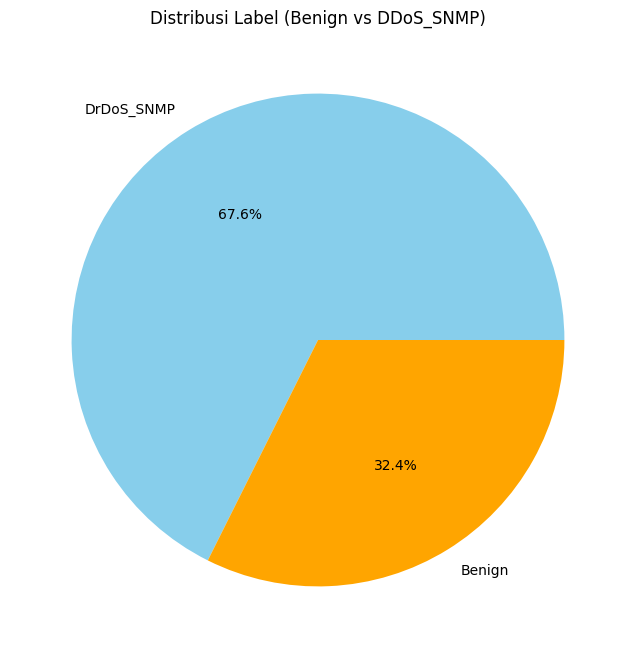

Deskripsi Distribusi Label:
DrDoS_SNMP    2717
Benign        1301
Name: Label, dtype: int64


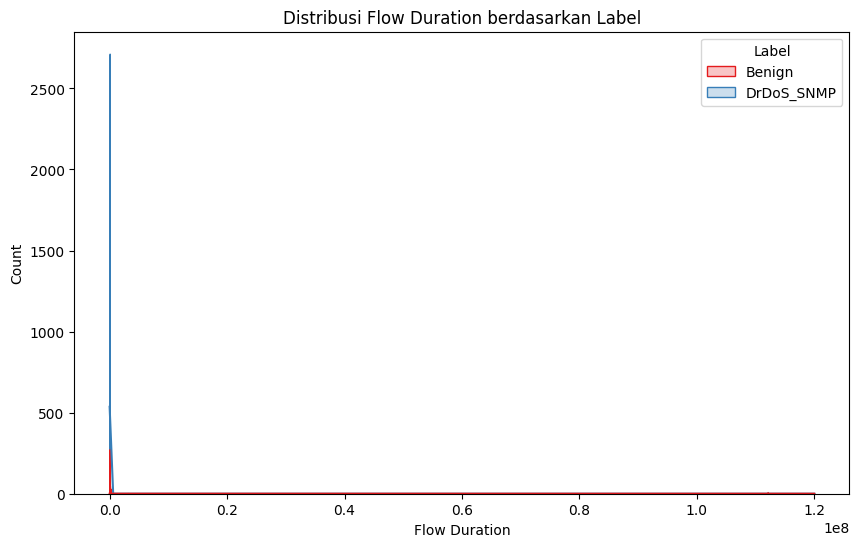


Deskripsi Flow Duration:
             count          mean           std  min      25%      50%  \
Label                                                                   
Benign      1301.0  6.619324e+06  2.507532e+07  1.0  20614.0  28462.0   
DrDoS_SNMP  2717.0  7.004556e+02  2.540708e+04  1.0      1.0      2.0   

                75%          max  
Label                             
Benign      91279.0  119980378.0  
DrDoS_SNMP      2.0     984719.0  
Fitur berikut tidak ditemukan dalam dataset: Total Packets, Bytes/s
Kolom 'Bytes/s' atau 'Flow Duration' tidak ditemukan dalam dataset.


In [22]:
# Visualisasi distribusi label (misalnya jika kolom 'Label' ada dalam dataset)
if 'Label' in df_SNMP_Testing.columns:
    plt.figure(figsize=(8, 8))
    df_SNMP_Testing["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
    plt.title("Distribusi Label (Benign vs DDoS_SNMP)")
    plt.ylabel("")  # Menghilangkan label y agar lebih bersih
    plt.show()

    # Deskripsi singkat tentang distribusi label
    print("Deskripsi Distribusi Label:")
    label_counts = df_SNMP_Testing["Label"].value_counts()
    print(label_counts)
else:
    print("Kolom 'Label' tidak ditemukan dalam dataset.")

# Misalkan fitur-fitur penting dalam dataset ini adalah: 'Flow Duration', 'Total Packets', 'Bytes/s'
# Anda bisa menyesuaikan fitur sesuai dengan kolom-kolom yang ada dalam dataset

# Visualisasi distribusi fitur 'Flow Duration'
if 'Flow Duration' in df_SNMP_Testing.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_SNMP_Testing, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
    plt.title("Distribusi Flow Duration berdasarkan Label")
    plt.xlabel("Flow Duration")
    plt.ylabel("Count")
    plt.show()

    # Deskripsi singkat tentang distribusi Flow Duration
    print("\nDeskripsi Flow Duration:")
    print(df_SNMP_Testing.groupby("Label")["Flow Duration"].describe())
else:
    print("Kolom 'Flow Duration' tidak ditemukan dalam dataset.")

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Packets", "Bytes/s", "Flow Duration"]  # Sesuaikan fitur dengan kolom dataset
missing_features = [feature for feature in features_of_interest if feature not in df_SNMP_Testing.columns]

if not missing_features:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_SNMP_Testing[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap Korelasi Fitur-Fitur Penting")
    plt.show()

    # Deskripsi singkat tentang korelasi fitur-fitur penting
    print("\nDeskripsi Korelasi Fitur:")
    print(df_SNMP_Testing[features_of_interest].corr())
else:
    print(f"Fitur berikut tidak ditemukan dalam dataset: {', '.join(missing_features)}")

# Visualisasi Boxplot untuk melihat distribusi dari 'Bytes/s' dan 'Flow Duration'
if 'Bytes/s' in df_SNMP_Testing.columns and 'Flow Duration' in df_SNMP_Testing.columns:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x="Label", y="Bytes/s", data=df_SNMP_Testing, palette="Set2")
    plt.title("Distribusi Bytes/s berdasarkan Label")

    plt.subplot(1, 2, 2)
    sns.boxplot(x="Label", y="Flow Duration", data=df_SNMP_Testing, palette="Set2")
    plt.title("Distribusi Flow Duration berdasarkan Label")

    plt.tight_layout()
    plt.show()

    # Deskripsi singkat tentang distribusi Bytes/s dan Flow Duration
    print("\nDeskripsi Bytes/s dan Flow Duration:")
    print(df_SNMP_Testing.groupby("Label")[["Bytes/s", "Flow Duration"]].describe())
else:
    print("Kolom 'Bytes/s' atau 'Flow Duration' tidak ditemukan dalam dataset.")


In [23]:
# membaca Dataset Syn Testing
df_Syn_Testing = pd.read_parquet("C:\Data Raihan\Penelitian Threshold\Dataset\CIC-DDoS2019\Syn-testing.parquet")
df_Syn_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  907 non-null    int8    
 1   Flow Duration             907 non-null    int32   
 2   Total Fwd Packets         907 non-null    int16   
 3   Total Backward Packets    907 non-null    int16   
 4   Fwd Packets Length Total  907 non-null    float32 
 5   Bwd Packets Length Total  907 non-null    float32 
 6   Fwd Packet Length Max     907 non-null    float32 
 7   Fwd Packet Length Min     907 non-null    float32 
 8   Fwd Packet Length Mean    907 non-null    float32 
 9   Fwd Packet Length Std     907 non-null    float32 
 10  Bwd Packet Length Max     907 non-null    float32 
 11  Bwd Packet Length Min     907 non-null    float32 
 12  Bwd Packet Length Mean    907 non-null    float32 
 13  Bwd Packet Length Std     907 non-null    float32 

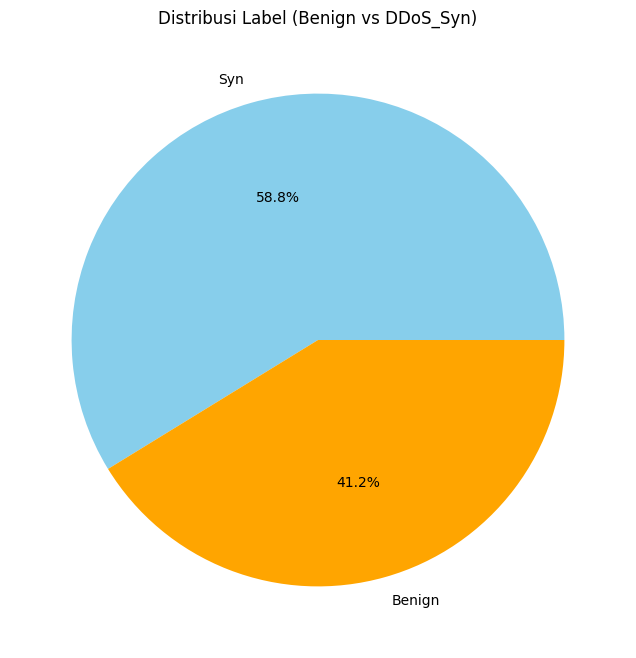

Deskripsi Distribusi Label:
Syn       533
Benign    374
Name: Label, dtype: int64


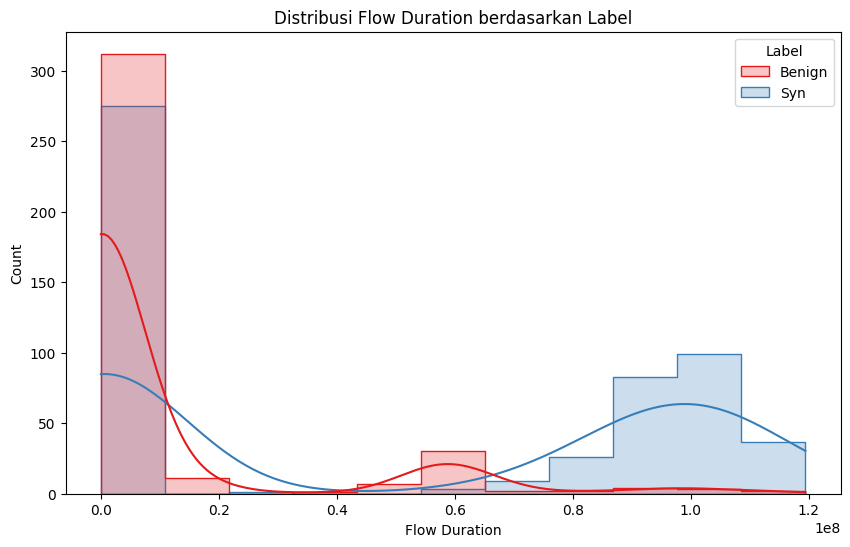


Deskripsi Flow Duration:
        count          mean           std  min       25%        50%  \
Label                                                                 
Benign  374.0  9.810638e+06  2.386019e+07  1.0  20762.25    20923.0   
Syn     533.0  4.734012e+07  4.901481e+07  1.0    101.00  6015393.0   

               75%          max  
Label                            
Benign     89950.0  114375872.0  
Syn     97930589.0  119442795.0  


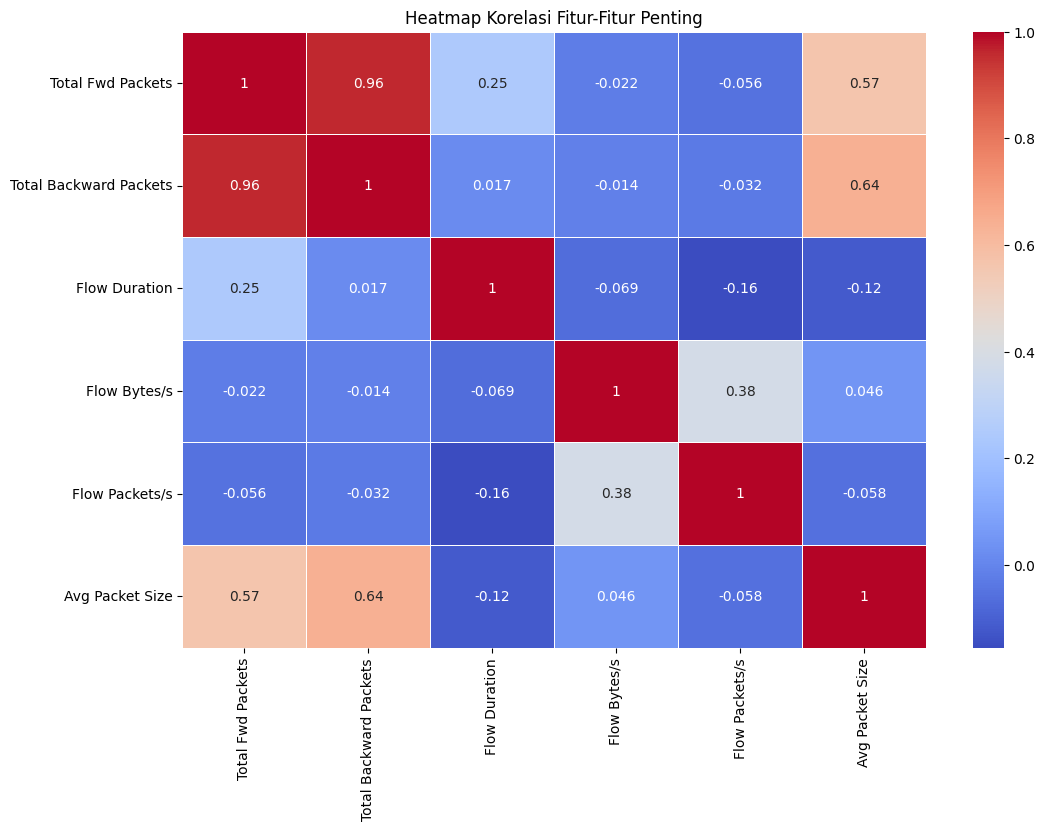


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.962745   
Total Backward Packets           0.962745                1.000000   
Flow Duration                    0.245170                0.016655   
Flow Bytes/s                    -0.022269               -0.013881   
Flow Packets/s                  -0.055875               -0.032465   
Avg Packet Size                  0.565444                0.642737   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.245170     -0.022269       -0.055875   
Total Backward Packets       0.016655     -0.013881       -0.032465   
Flow Duration                1.000000     -0.068807       -0.155689   
Flow Bytes/s                -0.068807      1.000000        0.380323   
Flow Packets/s              -0.155689      0.380323        1.000000   
Avg Packet Size             -0.116495      0.045521       -0.05

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3146994721.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_Syn_Testing, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3146994721.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_Syn_Testing, palette="Set2")


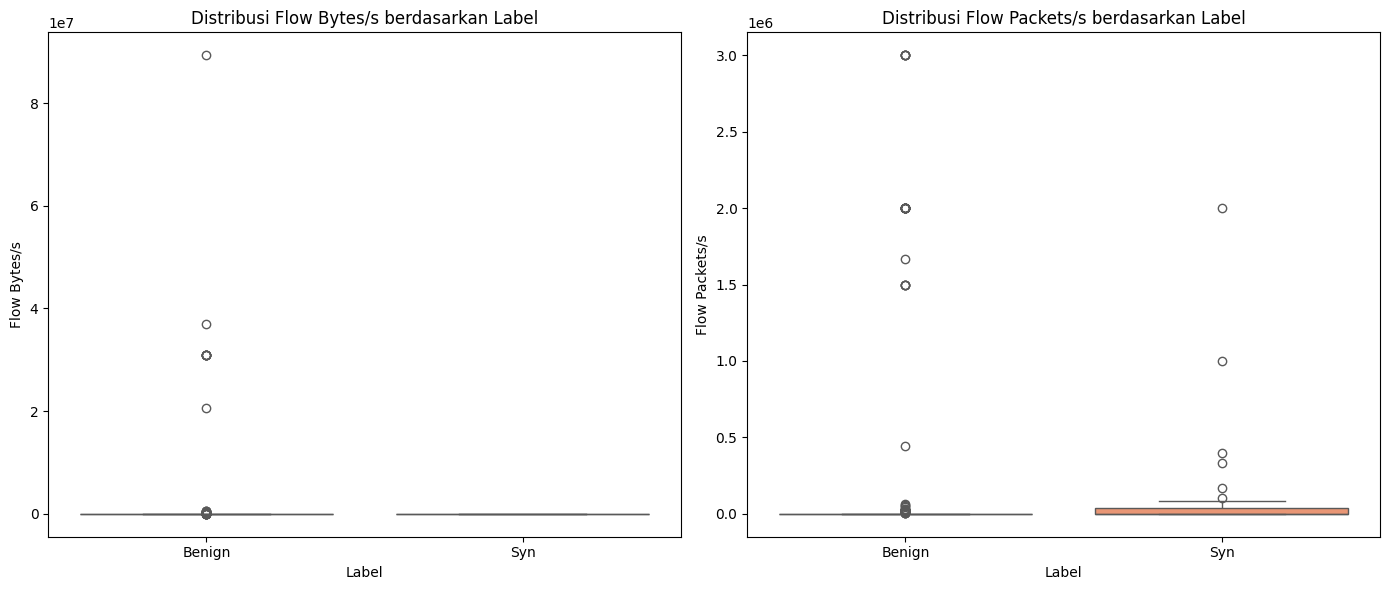


Deskripsi Flow Bytes/s dan Flow Packets/s:
       Flow Bytes/s                                                      \
              count           mean           std  min  25%          50%   
Label                                                                     
Benign        374.0  990886.204729  6.577609e+06  0.0  0.0  5493.188495   
Syn           533.0       0.000000  0.000000e+00  0.0  0.0     0.000000   

                                   Flow Packets/s                 \
                 75%           max          count           mean   
Label                                                              
Benign  12539.977976  8.933333e+07          374.0  161030.252955   
Syn         0.000000  0.000000e+00          533.0   26546.384039   

                                                                      \
                  std       min        25%         50%           75%   
Label                                                                  
Benign  565555.217090  

In [24]:
# Visualisasi distribusi label
plt.figure(figsize=(8, 8))
df_Syn_Testing["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label (Benign vs DDoS_Syn)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")
label_counts = df_Syn_Testing["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_Syn_Testing, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_Syn_Testing.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_Syn_Testing[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_Syn_Testing[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_Syn_Testing, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_Syn_Testing, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_Syn_Testing.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [25]:
# membaca Dataset Syn Training
df_Syn_Training = pd.read_parquet("C:\Data Raihan\Penelitian Threshold\Dataset\CIC-DDoS2019\Syn-training.parquet")
df_Syn_Training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70336 entries, 0 to 70335
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  70336 non-null  int8    
 1   Flow Duration             70336 non-null  int32   
 2   Total Fwd Packets         70336 non-null  int16   
 3   Total Backward Packets    70336 non-null  int16   
 4   Fwd Packets Length Total  70336 non-null  float32 
 5   Bwd Packets Length Total  70336 non-null  float32 
 6   Fwd Packet Length Max     70336 non-null  float32 
 7   Fwd Packet Length Min     70336 non-null  float32 
 8   Fwd Packet Length Mean    70336 non-null  float32 
 9   Fwd Packet Length Std     70336 non-null  float32 
 10  Bwd Packet Length Max     70336 non-null  float32 
 11  Bwd Packet Length Min     70336 non-null  float32 
 12  Bwd Packet Length Mean    70336 non-null  float32 
 13  Bwd Packet Length Std     70336 non-null  floa

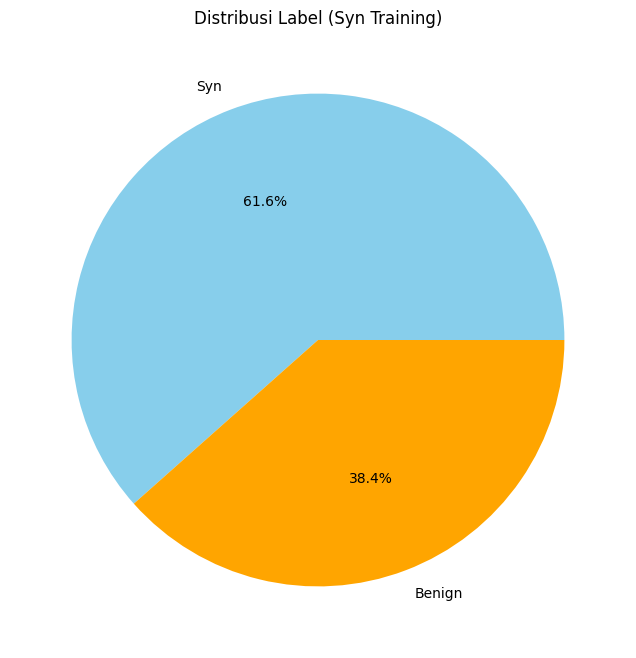

Deskripsi Distribusi Label:
Syn       43302
Benign    27034
Name: Label, dtype: int64


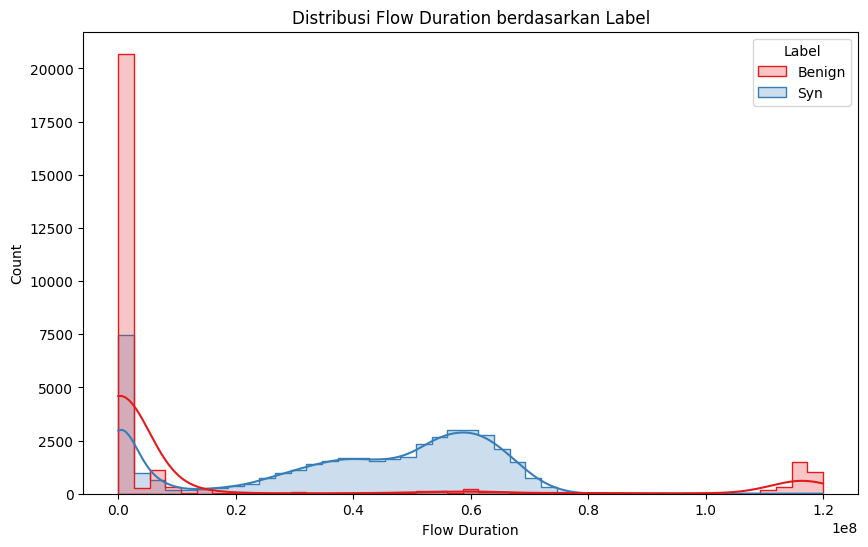


Deskripsi Flow Duration:
          count          mean           std  min         25%         50%  \
Label                                                                      
Benign  27034.0  1.666349e+07  3.804015e+07  1.0       915.0     23343.5   
Syn     43302.0  3.921851e+07  2.335815e+07  1.0  24082992.0  45696813.0   

               75%          max  
Label                            
Benign    500364.0  119992888.0  
Syn     58363943.0  119891552.0  


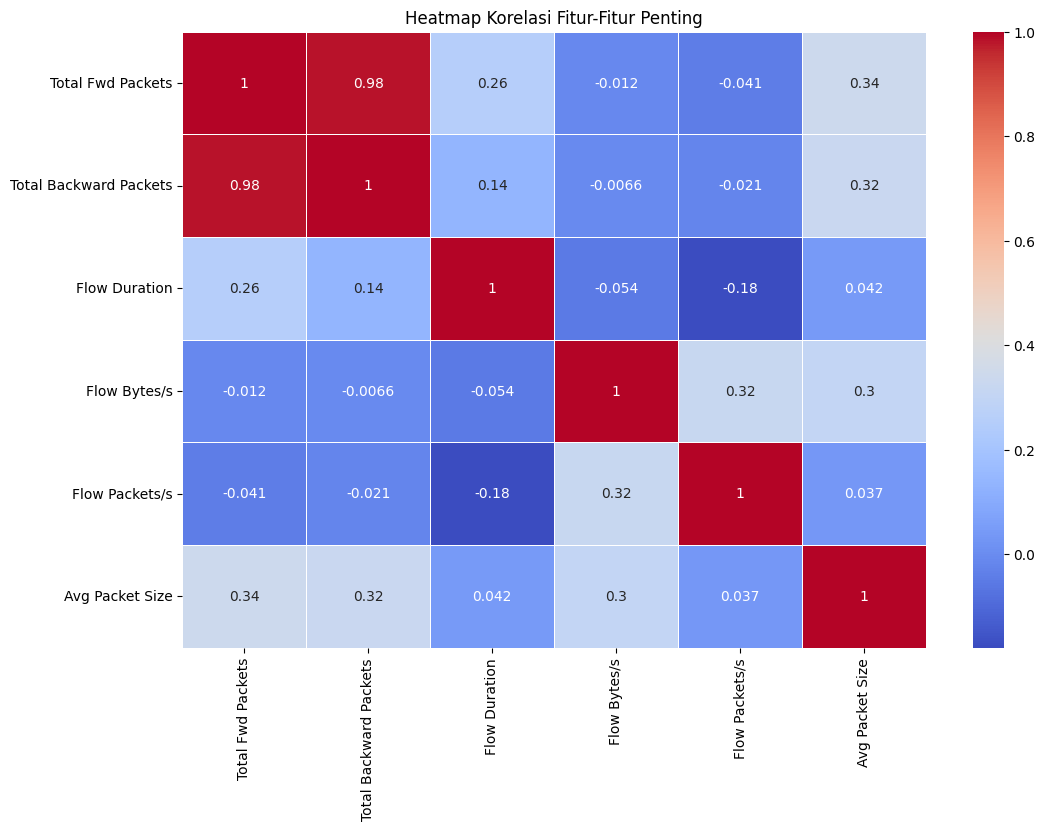


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.982136   
Total Backward Packets           0.982136                1.000000   
Flow Duration                    0.257412                0.135616   
Flow Bytes/s                    -0.011964               -0.006645   
Flow Packets/s                  -0.040703               -0.021330   
Avg Packet Size                  0.337176                0.324287   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.257412     -0.011964       -0.040703   
Total Backward Packets       0.135616     -0.006645       -0.021330   
Flow Duration                1.000000     -0.053558       -0.178711   
Flow Bytes/s                -0.053558      1.000000        0.322491   
Flow Packets/s              -0.178711      0.322491        1.000000   
Avg Packet Size              0.042488      0.303378        0.03

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\617920793.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label" if "Label" in df_Syn_Training.columns else None, y="Flow Bytes/s", data=df_Syn_Training, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\617920793.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label" if "Label" in df_Syn_Training.columns else None, y="Flow Packets/s", data=df_Syn_Training, palette="Set2")


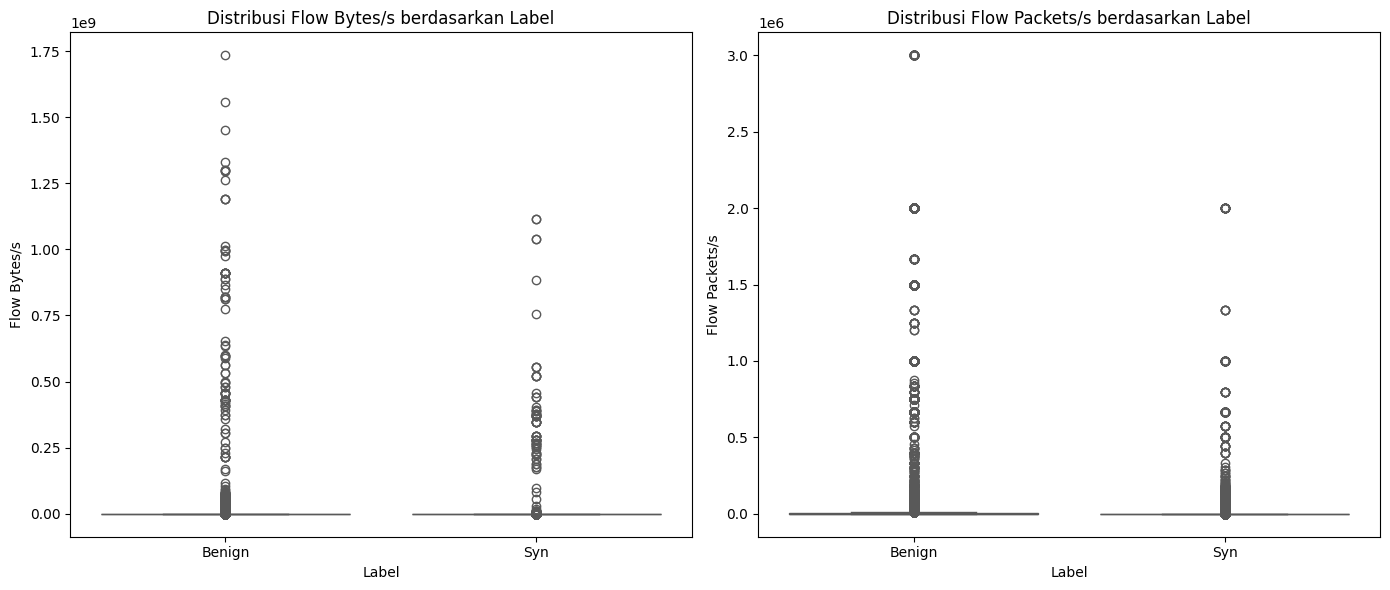


Deskripsi Flow Bytes/s dan Flow Packets/s:
       Flow Bytes/s                                                            \
              count          mean           std  min         25%          50%   
Label                                                                           
Benign      27034.0  3.402058e+06  4.434168e+07  0.0  133.359687  7529.962981   
Syn         43302.0  6.712711e+05  1.775520e+07  0.0    1.347013     1.775957   

                                   Flow Packets/s                 \
                 75%           max          count           mean   
Label                                                              
Benign  30466.098200  1.734000e+09        27034.0  111444.348438   
Syn         2.761576  1.114000e+09        43302.0    8121.466736   

                                                                                
                  std       min        25%         50%          75%        max  
Label                                          

In [26]:
# Visualisasi distribusi label (jika ada label)
if "Label" in df_Syn_Training.columns:
    plt.figure(figsize=(8, 8))
    df_Syn_Training["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
    plt.title("Distribusi Label (Syn Training)")
    plt.ylabel("")  # Menghilangkan label y agar lebih bersih
    plt.show()

    # Deskripsi singkat tentang distribusi label
    print("Deskripsi Distribusi Label:")
    label_counts = df_Syn_Training["Label"].value_counts()
    print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration' (contoh fitur)
if "Flow Duration" in df_Syn_Training.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_Syn_Training, x="Flow Duration", hue="Label" if "Label" in df_Syn_Training.columns else None, element="step", palette="Set1", kde=True)
    plt.title("Distribusi Flow Duration berdasarkan Label")
    plt.xlabel("Flow Duration")
    plt.ylabel("Count")
    plt.show()

    # Deskripsi singkat tentang distribusi Flow Duration
    print("\nDeskripsi Flow Duration:")
    print(df_Syn_Training.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting (contoh fitur)
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]

# Memastikan fitur ada dalam dataset sebelum visualisasi
features_of_interest = [feature for feature in features_of_interest if feature in df_Syn_Training.columns]

if len(features_of_interest) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_Syn_Training[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap Korelasi Fitur-Fitur Penting")
    plt.show()

    # Deskripsi singkat tentang korelasi fitur-fitur penting
    print("\nDeskripsi Korelasi Fitur:")
    print(df_Syn_Training[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
if "Flow Bytes/s" in df_Syn_Training.columns and "Flow Packets/s" in df_Syn_Training.columns:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x="Label" if "Label" in df_Syn_Training.columns else None, y="Flow Bytes/s", data=df_Syn_Training, palette="Set2")
    plt.title("Distribusi Flow Bytes/s berdasarkan Label")

    plt.subplot(1, 2, 2)
    sns.boxplot(x="Label" if "Label" in df_Syn_Training.columns else None, y="Flow Packets/s", data=df_Syn_Training, palette="Set2")
    plt.title("Distribusi Flow Packets/s berdasarkan Label")

    plt.tight_layout()
    plt.show()

    # Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
    print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
    print(df_Syn_Training.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [27]:
# membaca Dataset TFTP Testing
df_TFTP_Testing = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019\\TFTP-testing.parquet")
df_TFTP_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121833 entries, 0 to 121832
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Protocol                  121833 non-null  int8    
 1   Flow Duration             121833 non-null  int32   
 2   Total Fwd Packets         121833 non-null  int16   
 3   Total Backward Packets    121833 non-null  int16   
 4   Fwd Packets Length Total  121833 non-null  float32 
 5   Bwd Packets Length Total  121833 non-null  float32 
 6   Fwd Packet Length Max     121833 non-null  float32 
 7   Fwd Packet Length Min     121833 non-null  float32 
 8   Fwd Packet Length Mean    121833 non-null  float32 
 9   Fwd Packet Length Std     121833 non-null  float32 
 10  Bwd Packet Length Max     121833 non-null  float32 
 11  Bwd Packet Length Min     121833 non-null  float32 
 12  Bwd Packet Length Mean    121833 non-null  float32 
 13  Bwd Packet Length Std     121

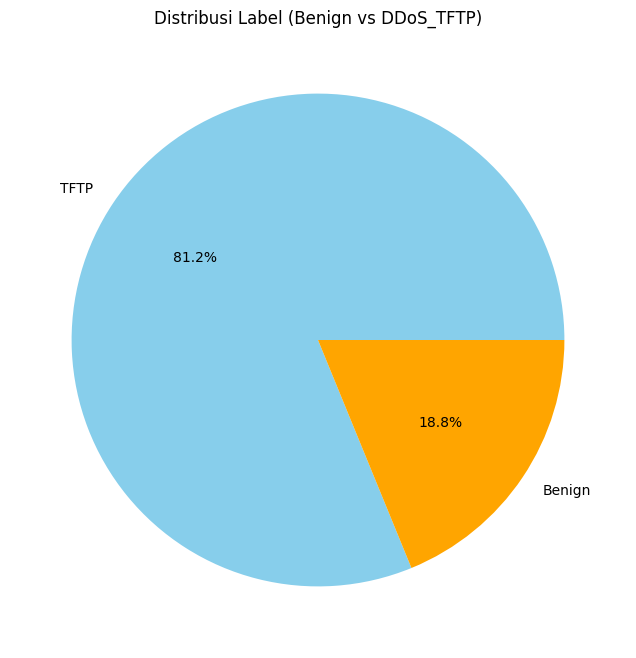

Deskripsi Distribusi Label:
TFTP      98917
Benign    22916
Name: Label, dtype: int64


<Figure size 1200x800 with 0 Axes>

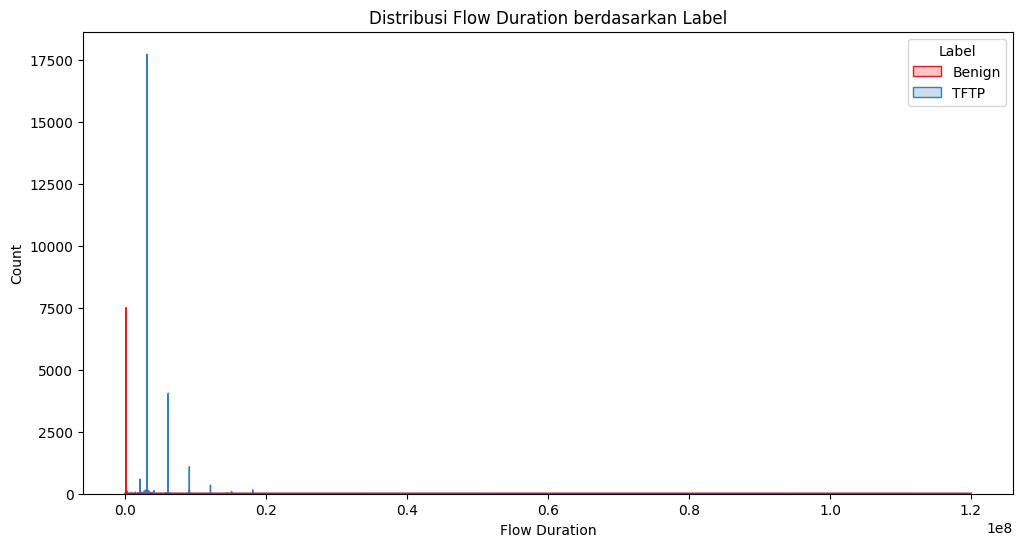

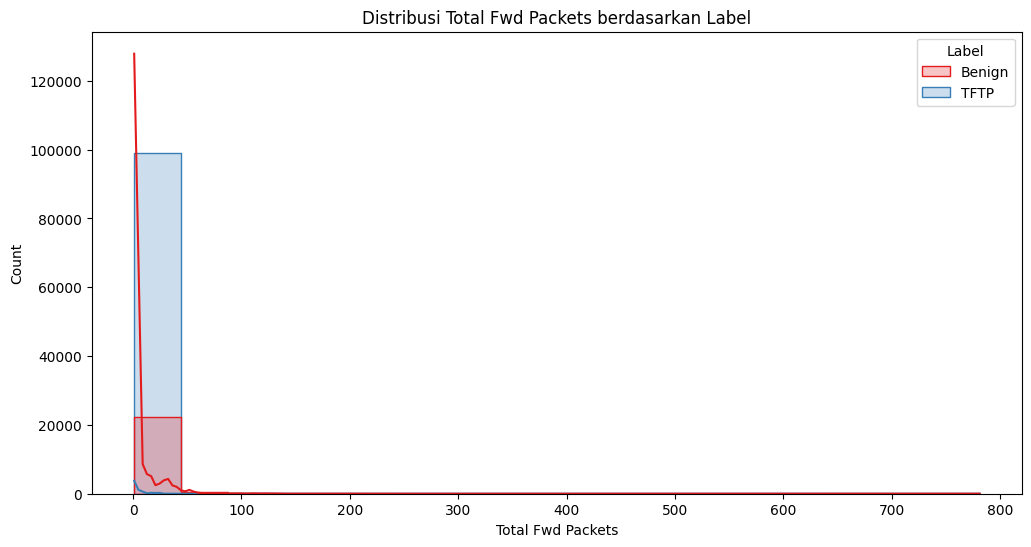

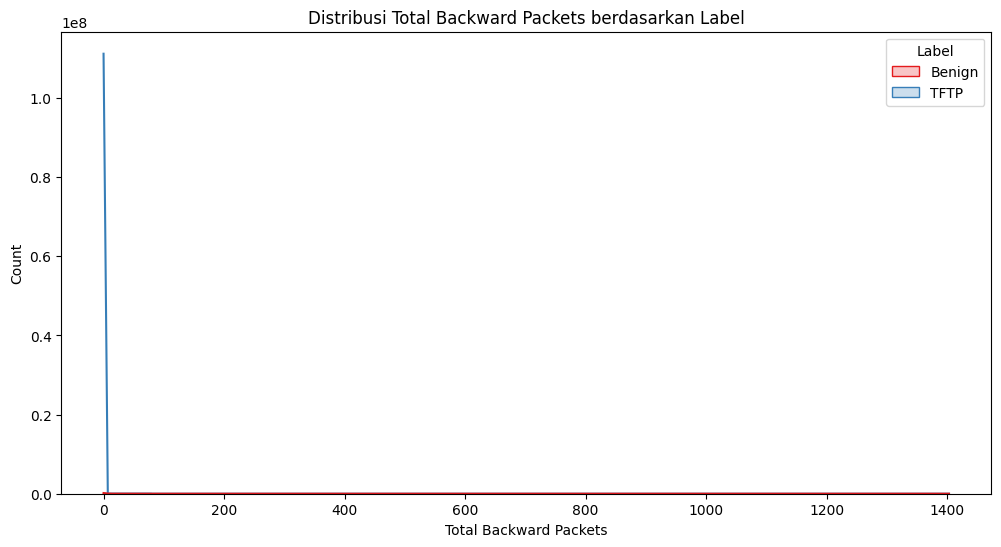

MemoryError: Unable to allocate 5.95 GiB for an array with shape (1, 799233273) and data type float64

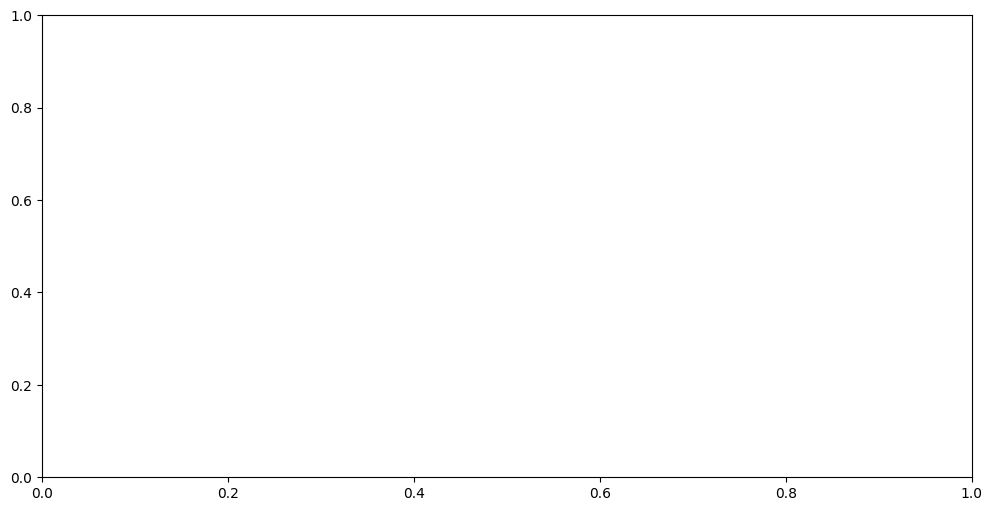

In [28]:
# Visualisasi distribusi label (Benign vs DDoS_TFTP) jika ada
if 'Label' in df_TFTP_Testing.columns:
    plt.figure(figsize=(8, 8))
    df_TFTP_Testing["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
    plt.title("Distribusi Label (Benign vs DDoS_TFTP)")
    plt.ylabel("")  # Menghilangkan label y agar lebih bersih
    plt.show()

    # Deskripsi singkat tentang distribusi label
    print("Deskripsi Distribusi Label:")
    label_counts = df_TFTP_Testing["Label"].value_counts()
    print(label_counts)

# Visualisasi distribusi fitur utama
# Misalnya, jika fitur-fitur berikut ada di dataset
features_of_interest = ["Flow Duration", "Total Fwd Packets", "Total Backward Packets", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]

# Memeriksa fitur yang ada dalam dataset
available_features = [feature for feature in features_of_interest if feature in df_TFTP_Testing.columns]

# Visualisasi distribusi fitur utama
if available_features:
    plt.figure(figsize=(12, 8))
    for feature in available_features:
        plt.figure(figsize=(12, 6))
        sns.histplot(df_TFTP_Testing, x=feature, hue="Label", element="step", palette="Set1", kde=True)
        plt.title(f"Distribusi {feature} berdasarkan Label")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.show()

    # Deskripsi singkat tentang fitur utama
    print("\nDeskripsi Fitur Utama:")
    print(df_TFTP_Testing.groupby("Label")[available_features].describe())

# Visualisasi korelasi antara beberapa fitur penting
if len(available_features) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_TFTP_Testing[available_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap Korelasi Fitur-Fitur Penting")
    plt.show()

    # Deskripsi singkat tentang korelasi fitur-fitur penting
    print("\nDeskripsi Korelasi Fitur:")
    print(df_TFTP_Testing[available_features].corr())

# Visualisasi Boxplot untuk melihat distribusi dari beberapa fitur jika ada
plt.figure(figsize=(14, 6))

if "Flow Bytes/s" in df_TFTP_Testing.columns:
    plt.subplot(1, 2, 1)
    sns.boxplot(x="Label", y="Flow Bytes/s", data=df_TFTP_Testing, palette="Set2")
    plt.title("Distribusi Flow Bytes/s berdasarkan Label")

if "Flow Packets/s" in df_TFTP_Testing.columns:
    plt.subplot(1, 2, 2)
    sns.boxplot(x="Label", y="Flow Packets/s", data=df_TFTP_Testing, palette="Set2")
    plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi fitur jika ada
if "Flow Bytes/s" in df_TFTP_Testing.columns and "Flow Packets/s" in df_TFTP_Testing.columns:
    print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
    print(df_TFTP_Testing.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())


In [29]:
# membaca Dataset UDPLag Testing
df_UDPLag_Testing = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019\\UDPLag-testing.parquet")
df_UDPLag_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12465 entries, 0 to 12464
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  12465 non-null  int8    
 1   Flow Duration             12465 non-null  int32   
 2   Total Fwd Packets         12465 non-null  int16   
 3   Total Backward Packets    12465 non-null  int16   
 4   Fwd Packets Length Total  12465 non-null  float32 
 5   Bwd Packets Length Total  12465 non-null  float32 
 6   Fwd Packet Length Max     12465 non-null  float32 
 7   Fwd Packet Length Min     12465 non-null  float32 
 8   Fwd Packet Length Mean    12465 non-null  float32 
 9   Fwd Packet Length Std     12465 non-null  float32 
 10  Bwd Packet Length Max     12465 non-null  float32 
 11  Bwd Packet Length Min     12465 non-null  float32 
 12  Bwd Packet Length Mean    12465 non-null  float32 
 13  Bwd Packet Length Std     12465 non-null  floa

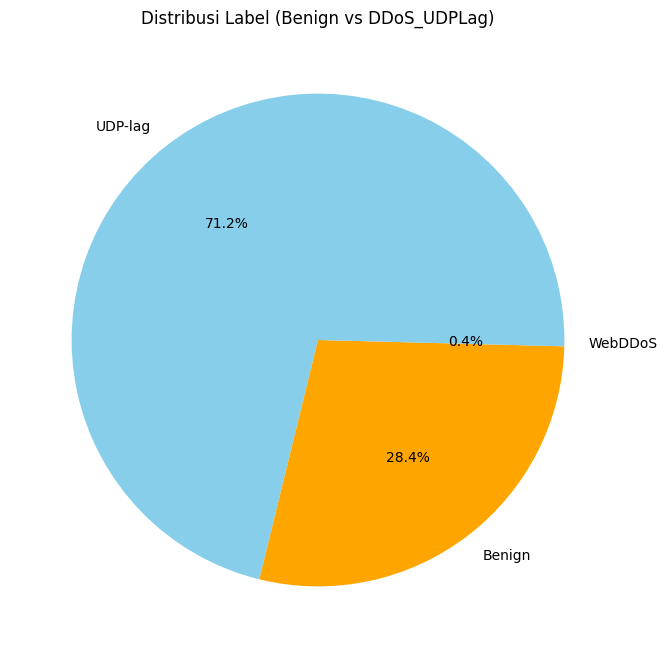

Deskripsi Distribusi Label:
UDP-lag    8872
Benign     3542
WebDDoS      51
Name: Label, dtype: int64


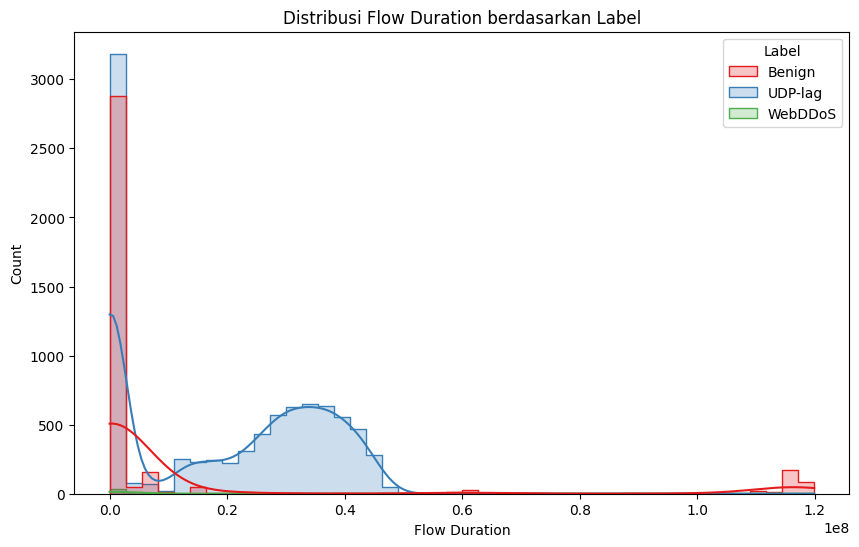

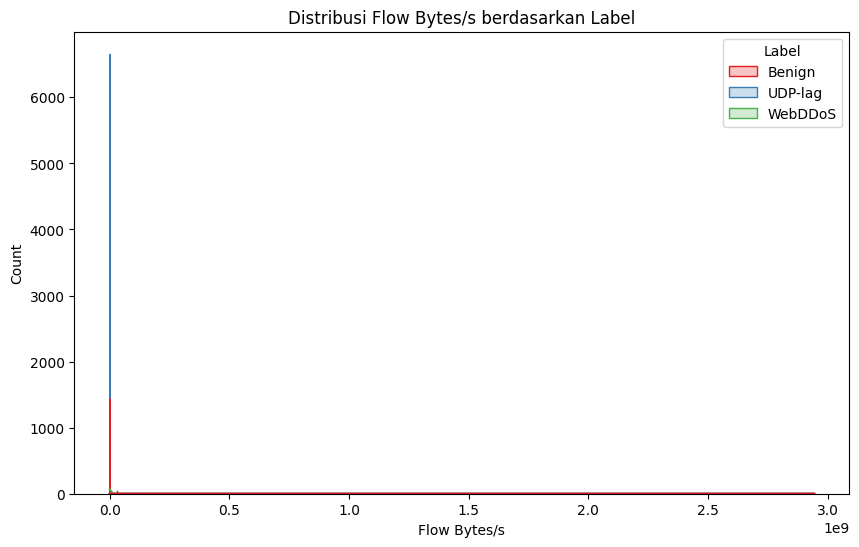

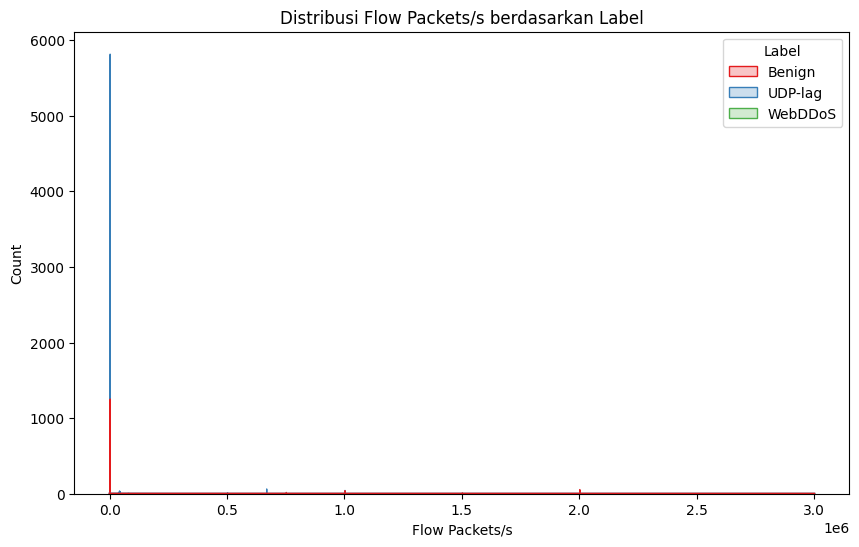

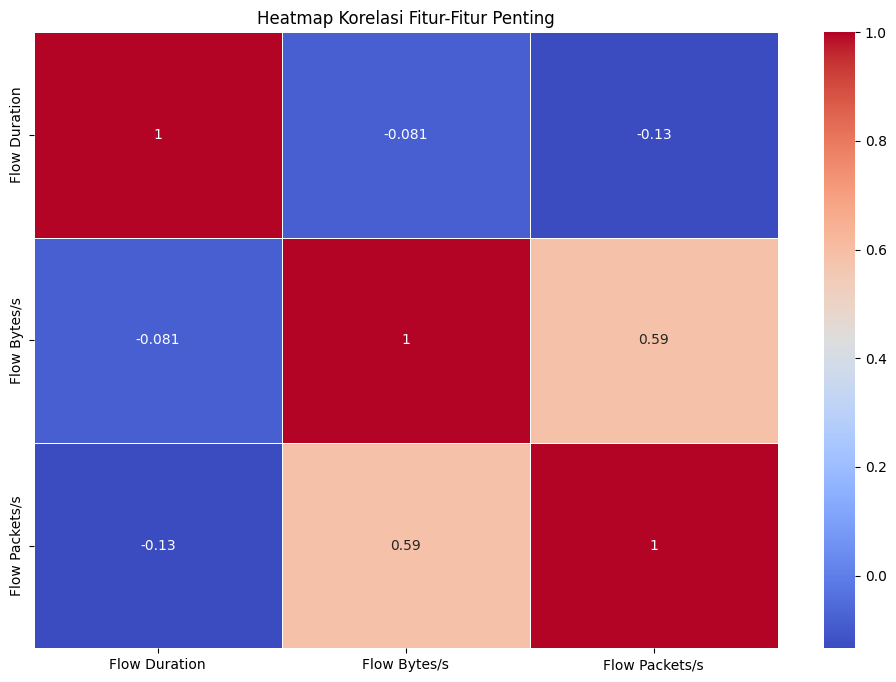


Deskripsi Korelasi Fitur:
                Flow Duration  Flow Bytes/s  Flow Packets/s
Flow Duration        1.000000     -0.081446       -0.133813
Flow Bytes/s        -0.081446      1.000000        0.588023
Flow Packets/s      -0.133813      0.588023        1.000000


C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3485903978.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_UDPLag_Testing, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3485903978.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_UDPLag_Testing, palette="Set2")


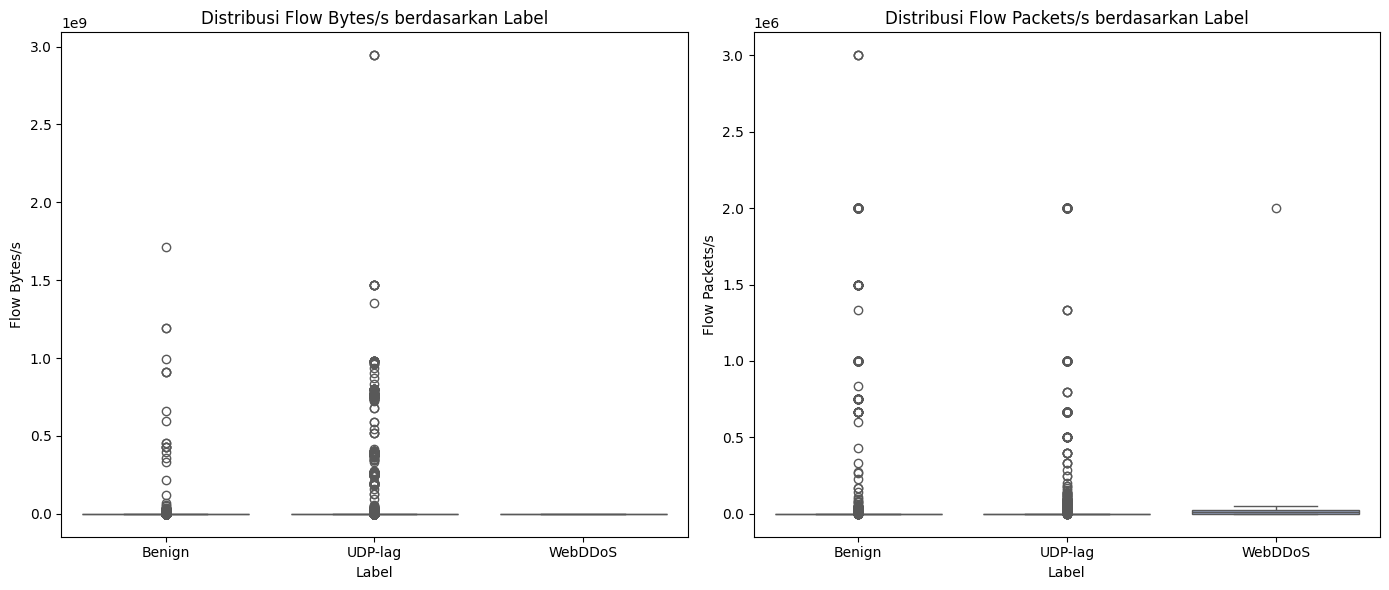


Deskripsi Flow Bytes/s dan Flow Packets/s:
        Flow Bytes/s                                                     \
               count          mean           std  min  25%          50%   
Label                                                                     
Benign        3542.0  4.256700e+06  5.739765e+07  0.0  0.0  5600.014276   
UDP-lag       8872.0  1.219859e+07  1.032259e+08  0.0  0.0     0.000000   
WebDDoS         51.0  2.393626e+02  4.058282e+02  0.0  0.0     0.000000   

                                    Flow Packets/s                \
                  75%           max          count          mean   
Label                                                              
Benign   12936.550896  1.715000e+09         3542.0  69152.600335   
UDP-lag      0.000000  2.944000e+09         8872.0  28925.303188   
WebDDoS    651.652758  1.311960e+03           51.0  54051.034950   

                                                                         \
                   st

In [30]:
# Visualisasi distribusi label (contoh: 'Label' sebagai kolom label)
if 'Label' in df_UDPLag_Testing.columns:
    plt.figure(figsize=(8, 8))
    df_UDPLag_Testing["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
    plt.title("Distribusi Label (Benign vs DDoS_UDPLag)")
    plt.ylabel("")  # Menghilangkan label y agar lebih bersih
    plt.show()

    # Deskripsi singkat tentang distribusi label
    print("Deskripsi Distribusi Label:")
    label_counts = df_UDPLag_Testing["Label"].value_counts()
    print(label_counts)
else:
    print("Kolom 'Label' tidak ditemukan dalam dataset.")

# Visualisasi distribusi fitur utama (contoh: 'Flow Duration' dan 'Flow Bytes/s')
features_to_plot = ['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s']

for feature in features_to_plot:
    if feature in df_UDPLag_Testing.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_UDPLag_Testing, x=feature, hue="Label", element="step", palette="Set1", kde=True)
        plt.title(f"Distribusi {feature} berdasarkan Label")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.show()
    else:
        print(f"Kolom '{feature}' tidak ditemukan dalam dataset.")

# Visualisasi korelasi antara beberapa fitur utama
if set(features_to_plot).issubset(df_UDPLag_Testing.columns):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_UDPLag_Testing[features_to_plot].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap Korelasi Fitur-Fitur Penting")
    plt.show()

    # Deskripsi singkat tentang korelasi fitur-fitur penting
    print("\nDeskripsi Korelasi Fitur:")
    print(df_UDPLag_Testing[features_to_plot].corr())
else:
    print("Beberapa kolom fitur utama tidak ditemukan dalam dataset.")

# Visualisasi Boxplot untuk melihat distribusi dari fitur-fitur tertentu
plt.figure(figsize=(14, 6))

if 'Flow Bytes/s' in df_UDPLag_Testing.columns:
    plt.subplot(1, 2, 1)
    sns.boxplot(x="Label", y="Flow Bytes/s", data=df_UDPLag_Testing, palette="Set2")
    plt.title("Distribusi Flow Bytes/s berdasarkan Label")

if 'Flow Packets/s' in df_UDPLag_Testing.columns:
    plt.subplot(1, 2, 2)
    sns.boxplot(x="Label", y="Flow Packets/s", data=df_UDPLag_Testing, palette="Set2")
    plt.title("Distribusi Flow Packets/s berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
if set(['Flow Bytes/s', 'Flow Packets/s']).issubset(df_UDPLag_Testing.columns):
    print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
    print(df_UDPLag_Testing.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())
else:
    print("Beberapa kolom fitur yang diperlukan tidak ditemukan dalam dataset.")


In [31]:
# membaca Dataset UDPLag Training
df_UDPLag_Training = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019\\UDPLag-training.parquet")
df_UDPLag_Training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12639 entries, 0 to 12638
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  12639 non-null  int8    
 1   Flow Duration             12639 non-null  int32   
 2   Total Fwd Packets         12639 non-null  int16   
 3   Total Backward Packets    12639 non-null  int16   
 4   Fwd Packets Length Total  12639 non-null  float32 
 5   Bwd Packets Length Total  12639 non-null  float32 
 6   Fwd Packet Length Max     12639 non-null  float32 
 7   Fwd Packet Length Min     12639 non-null  float32 
 8   Fwd Packet Length Mean    12639 non-null  float32 
 9   Fwd Packet Length Std     12639 non-null  float32 
 10  Bwd Packet Length Max     12639 non-null  float32 
 11  Bwd Packet Length Min     12639 non-null  float32 
 12  Bwd Packet Length Mean    12639 non-null  float32 
 13  Bwd Packet Length Std     12639 non-null  floa

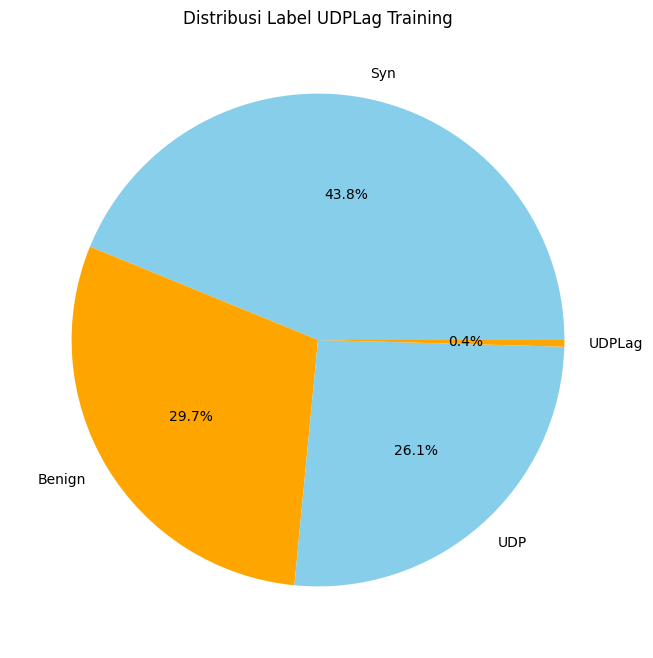


Deskripsi Distribusi Label:
Syn       5538
Benign    3748
UDP       3298
UDPLag      55
Name: Label, dtype: int64


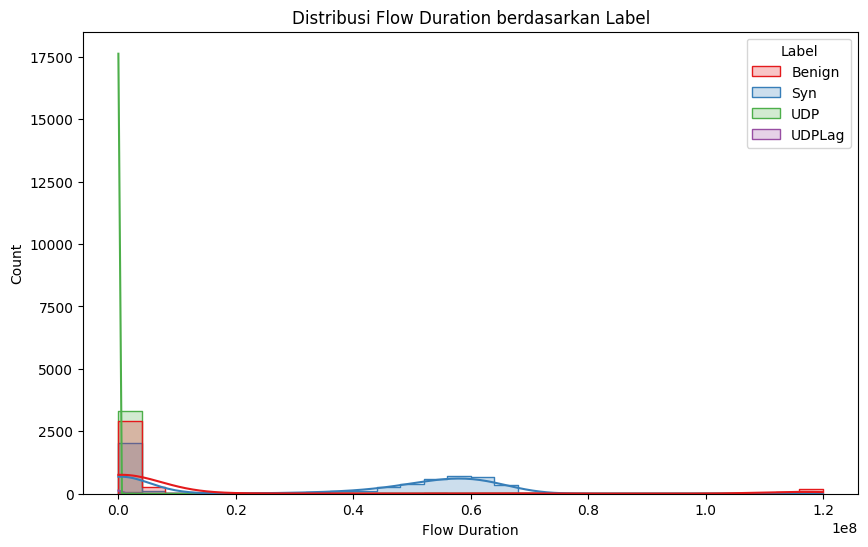


Deskripsi Flow Duration:
         count          mean           std  min        25%         50%  \
Label                                                                    
Benign  3748.0  1.329344e+07  3.387085e+07  1.0     264.00     21030.5   
Syn     5538.0  3.340999e+07  2.730996e+07  1.0     121.00  47712956.0   
UDP     3298.0  1.811571e+05  2.266182e+05  1.0  106161.25    108297.0   
UDPLag    55.0  2.344742e+05  1.556891e+06  1.0       3.00         3.0   

                75%          max  
Label                             
Benign    899780.00  119997515.0  
Syn     58067885.25   67935079.0  
UDP       214284.25    2485502.0  
UDPLag         4.00   11548068.0  


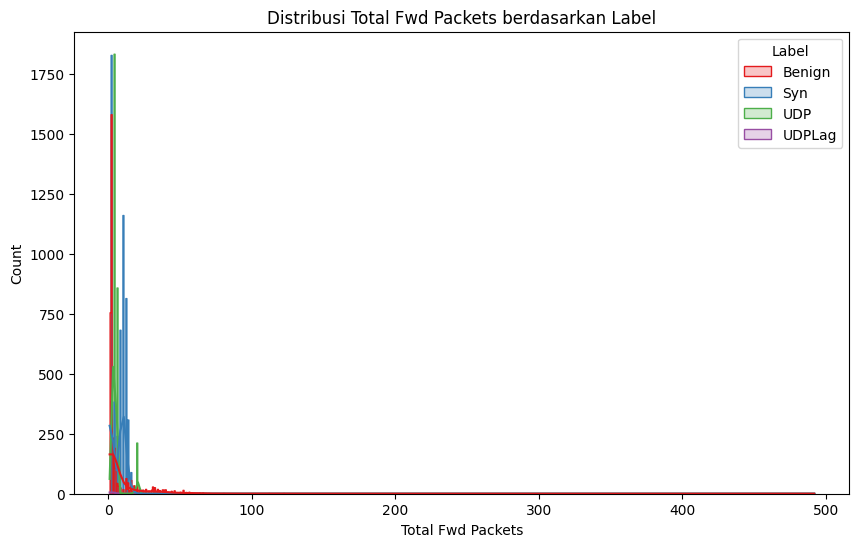


Deskripsi Total Fwd Packets:
         count      mean        std  min  25%  50%   75%    max
Label                                                          
Benign  3748.0  9.325240  24.302792  1.0  2.0  2.0   5.0  492.0
Syn     5538.0  7.179126   4.391372  2.0  2.0  8.0  10.0   22.0
UDP     3298.0  5.338084   4.062002  1.0  4.0  4.0   6.0   24.0
UDPLag    55.0  3.090909   5.313410  1.0  2.0  2.0   2.0   41.0


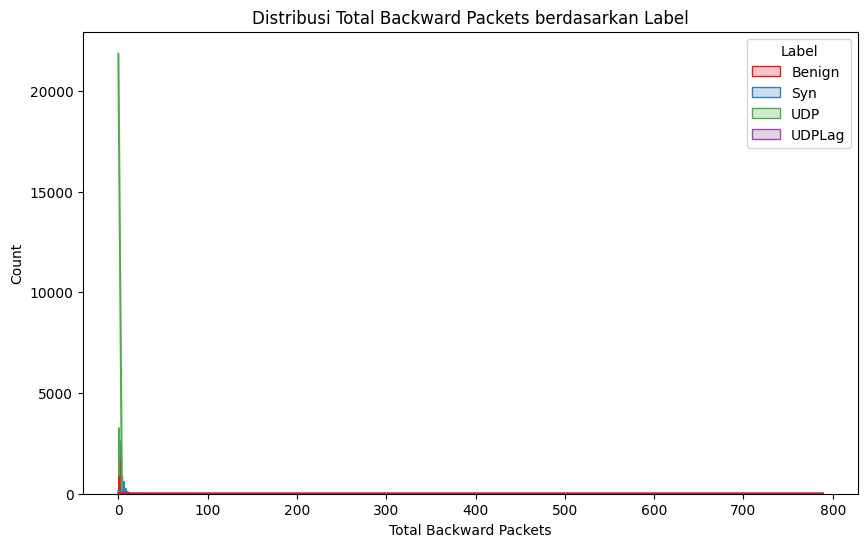


Deskripsi Total Backward Packets:
         count      mean        std  min  25%  50%  75%    max
Label                                                         
Benign  3748.0  9.112860  32.626855  0.0  1.0  2.0  3.0  789.0
Syn     5538.0  3.112315   2.659000  0.0  2.0  2.0  4.0   20.0
UDP     3298.0  0.001516   0.052225  0.0  0.0  0.0  0.0    2.0
UDPLag    55.0  0.872727   4.615010  0.0  0.0  0.0  0.0   34.0


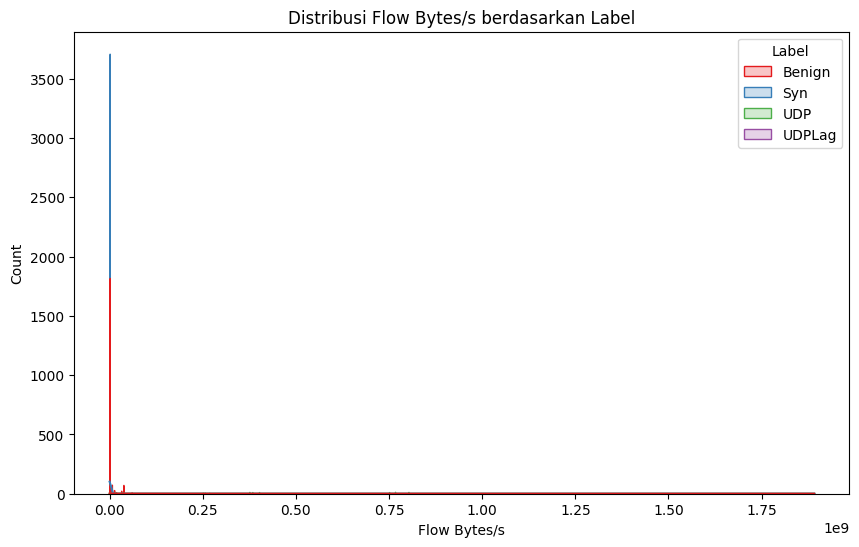


Deskripsi Flow Bytes/s:
         count          mean           std        min           25%  \
Label                                                                 
Benign  3748.0  1.119755e+07  9.420343e+07   0.000000  2.282528e+02   
Syn     5538.0  1.106046e+05  8.168543e+05   0.448110  1.414137e+00   
UDP     3298.0  3.437010e+07  1.403821e+08  50.738999  9.746227e+03   
UDPLag    55.0  2.541050e+08  1.852086e+08   0.000000  1.900000e+08   

                 50%           75%           max  
Label                                             
Benign  9.485647e+03  9.523810e+04  1.891000e+09  
Syn     2.017155e+00  1.951220e+05  5.600000e+07  
UDP     1.309577e+04  1.341962e+04  9.740000e+08  
UDPLag  2.513333e+08  2.946667e+08  1.140000e+09  


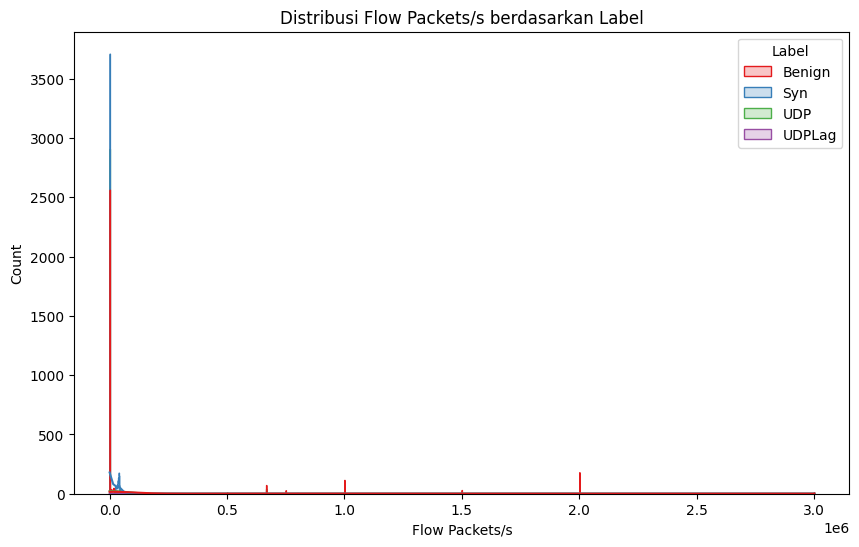


Deskripsi Flow Packets/s:
         count           mean            std       min            25%  \
Label                                                                   
Benign  3748.0  177573.943618  509418.083655  0.051398      10.605005   
Syn     5538.0   17109.908049   59763.602696  0.074685       0.235690   
UDP     3298.0   86998.928475  353715.365415  1.492323      28.000191   
UDPLag    55.0  613393.299913  369059.573963  6.494593  500000.000000   

                  50%            75%        max  
Label                                            
Benign     190.512479   13223.152551  3000000.0  
Syn          0.335912   32520.325203  2000000.0  
UDP         36.937340      37.678975  2000000.0  
UDPLag  666666.666667  666666.666667  2000000.0  


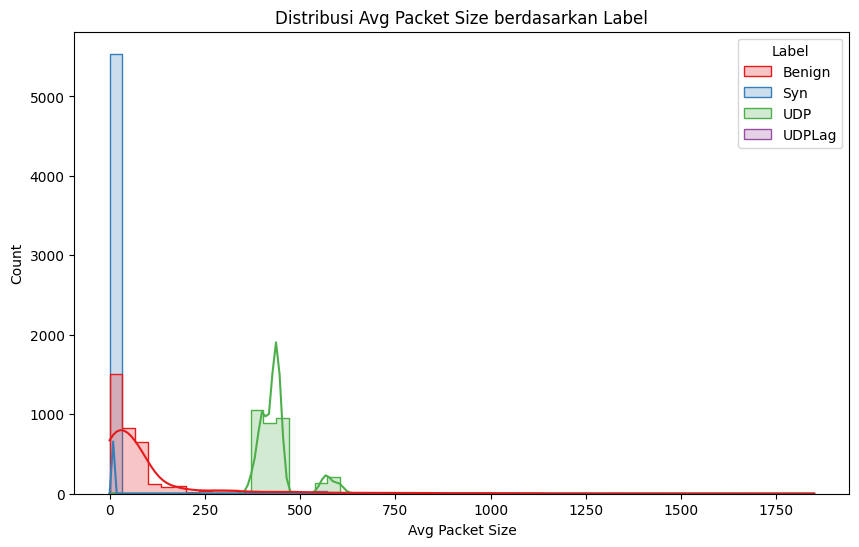


Deskripsi Avg Packet Size:
         count        mean         std       min      25%     50%         75%  \
Label                                                                           
Benign  3748.0  104.453667  190.544449  0.000000    8.000   46.75   86.055557   
Syn     5538.0    6.904231    0.742900  6.142857    6.375    6.60    7.500000   
UDP     3298.0  441.479828   59.411659  7.000000  401.500  432.00  442.000000   
UDPLag    55.0  533.782532  216.545654  0.000000  551.250  565.50  626.833313   

           max  
Label           
Benign  1849.5  
Syn       42.0  
UDP      835.5  
UDPLag   871.5  


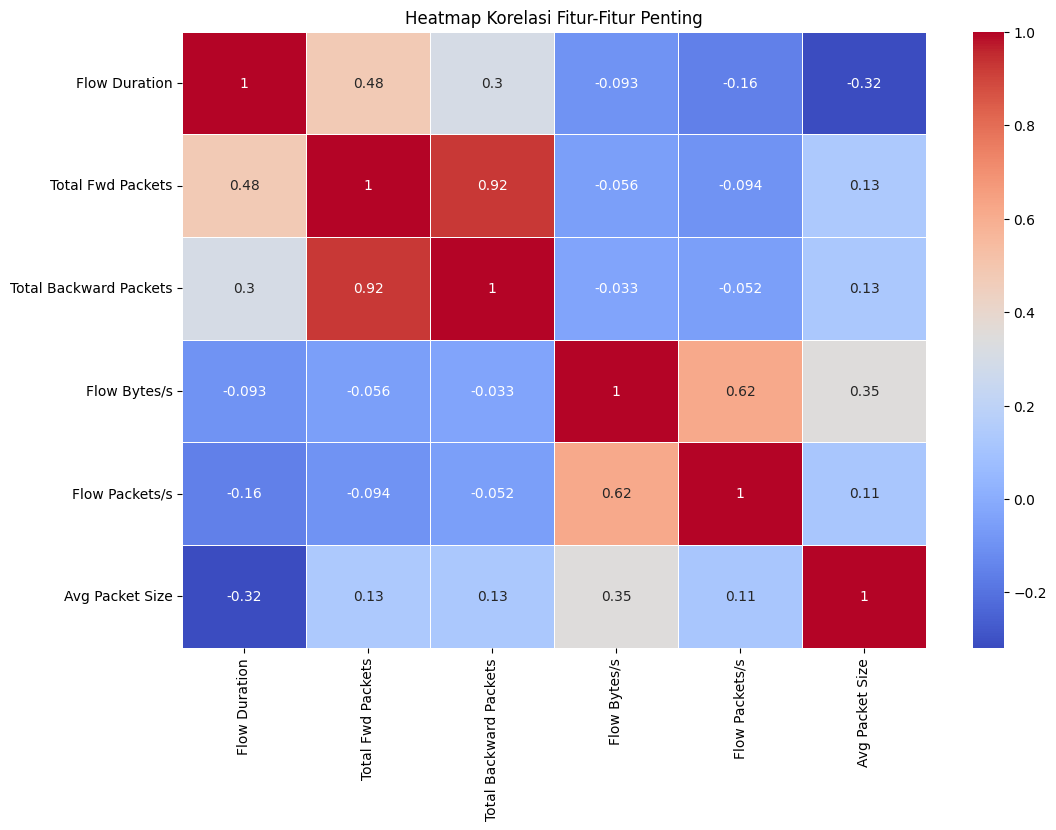


Deskripsi Korelasi Fitur:
                        Flow Duration  Total Fwd Packets  \
Flow Duration                1.000000           0.475449   
Total Fwd Packets            0.475449           1.000000   
Total Backward Packets       0.299692           0.924704   
Flow Bytes/s                -0.093305          -0.055519   
Flow Packets/s              -0.158381          -0.094264   
Avg Packet Size             -0.318471           0.131993   

                        Total Backward Packets  Flow Bytes/s  Flow Packets/s  \
Flow Duration                         0.299692     -0.093305       -0.158381   
Total Fwd Packets                     0.924704     -0.055519       -0.094264   
Total Backward Packets                1.000000     -0.032728       -0.052356   
Flow Bytes/s                         -0.032728      1.000000        0.617841   
Flow Packets/s                       -0.052356      0.617841        1.000000   
Avg Packet Size                       0.127073      0.350156        0.11

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3141695330.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=df_UDPLag_Training, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3141695330.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=df_UDPLag_Training, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3141695330.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=df_UDPLag_Training, pa

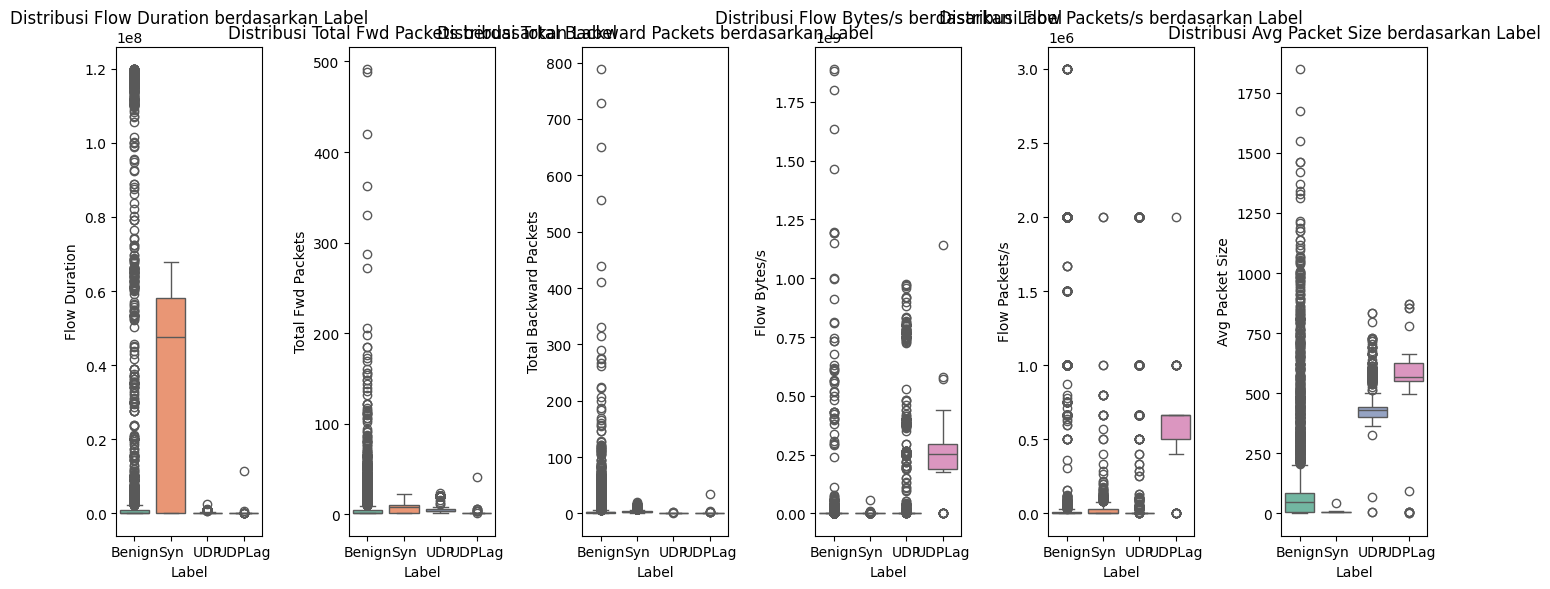


Deskripsi Fitur-Fitur:

Deskripsi Flow Duration:
         count          mean           std  min        25%         50%  \
Label                                                                    
Benign  3748.0  1.329344e+07  3.387085e+07  1.0     264.00     21030.5   
Syn     5538.0  3.340999e+07  2.730996e+07  1.0     121.00  47712956.0   
UDP     3298.0  1.811571e+05  2.266182e+05  1.0  106161.25    108297.0   
UDPLag    55.0  2.344742e+05  1.556891e+06  1.0       3.00         3.0   

                75%          max  
Label                             
Benign    899780.00  119997515.0  
Syn     58067885.25   67935079.0  
UDP       214284.25    2485502.0  
UDPLag         4.00   11548068.0  

Deskripsi Total Fwd Packets:
         count      mean        std  min  25%  50%   75%    max
Label                                                          
Benign  3748.0  9.325240  24.302792  1.0  2.0  2.0   5.0  492.0
Syn     5538.0  7.179126   4.391372  2.0  2.0  8.0  10.0   22.0
UDP     3

In [32]:
# Visualisasi distribusi label (jika ada kolom label)
if 'Label' in df_UDPLag_Training.columns:
    plt.figure(figsize=(8, 8))
    df_UDPLag_Training["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
    plt.title("Distribusi Label UDPLag Training")
    plt.ylabel("")  # Menghilangkan label y agar lebih bersih
    plt.show()

    # Deskripsi singkat tentang distribusi label
    print("\nDeskripsi Distribusi Label:")
    label_counts = df_UDPLag_Training["Label"].value_counts()
    print(label_counts)

# Visualisasi distribusi fitur penting
features_of_interest = ["Flow Duration", "Total Fwd Packets", "Total Backward Packets",
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]

# Memastikan fitur-fitur tersebut ada di dataset
features_of_interest = [feature for feature in features_of_interest if feature in df_UDPLag_Training.columns]

# Visualisasi distribusi setiap fitur
for feature in features_of_interest:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_UDPLag_Training, x=feature, hue="Label", element="step", palette="Set1", kde=True)
    plt.title(f"Distribusi {feature} berdasarkan Label")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

    # Deskripsi singkat tentang distribusi fitur
    print(f"\nDeskripsi {feature}:")
    print(df_UDPLag_Training.groupby("Label")[feature].describe())

# Visualisasi korelasi antara fitur penting
if len(features_of_interest) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_UDPLag_Training[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap Korelasi Fitur-Fitur Penting")
    plt.show()

    # Deskripsi singkat tentang korelasi fitur-fitur penting
    print("\nDeskripsi Korelasi Fitur:")
    print(df_UDPLag_Training[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari beberapa fitur jika Label ada
if 'Label' in df_UDPLag_Training.columns:
    plt.figure(figsize=(14, 6))

    for i, feature in enumerate(features_of_interest):
        plt.subplot(1, len(features_of_interest), i + 1)
        sns.boxplot(x="Label", y=feature, data=df_UDPLag_Training, palette="Set2")
        plt.title(f"Distribusi {feature} berdasarkan Label")

    plt.tight_layout()
    plt.show()

    # Deskripsi singkat tentang distribusi fitur
    print("\nDeskripsi Fitur-Fitur:")
    for feature in features_of_interest:
        print(f"\nDeskripsi {feature}:")
        print(df_UDPLag_Training.groupby("Label")[feature].describe())


In [33]:
# membaca Dataset UDP Testing
df_UDP_Testing = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019\\UDP-testing.parquet")
df_UDP_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12462 entries, 0 to 12461
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  12462 non-null  int8    
 1   Flow Duration             12462 non-null  int32   
 2   Total Fwd Packets         12462 non-null  int16   
 3   Total Backward Packets    12462 non-null  int16   
 4   Fwd Packets Length Total  12462 non-null  float32 
 5   Bwd Packets Length Total  12462 non-null  float32 
 6   Fwd Packet Length Max     12462 non-null  float32 
 7   Fwd Packet Length Min     12462 non-null  float32 
 8   Fwd Packet Length Mean    12462 non-null  float32 
 9   Fwd Packet Length Std     12462 non-null  float32 
 10  Bwd Packet Length Max     12462 non-null  float32 
 11  Bwd Packet Length Min     12462 non-null  float32 
 12  Bwd Packet Length Mean    12462 non-null  float32 
 13  Bwd Packet Length Std     12462 non-null  floa

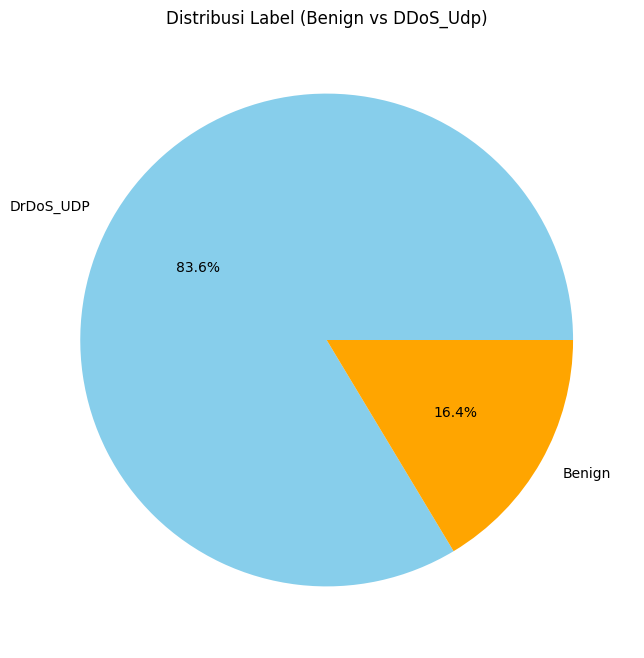

Deskripsi Distribusi Label:
DrDoS_UDP    10420
Benign        2042
Name: Label, dtype: int64


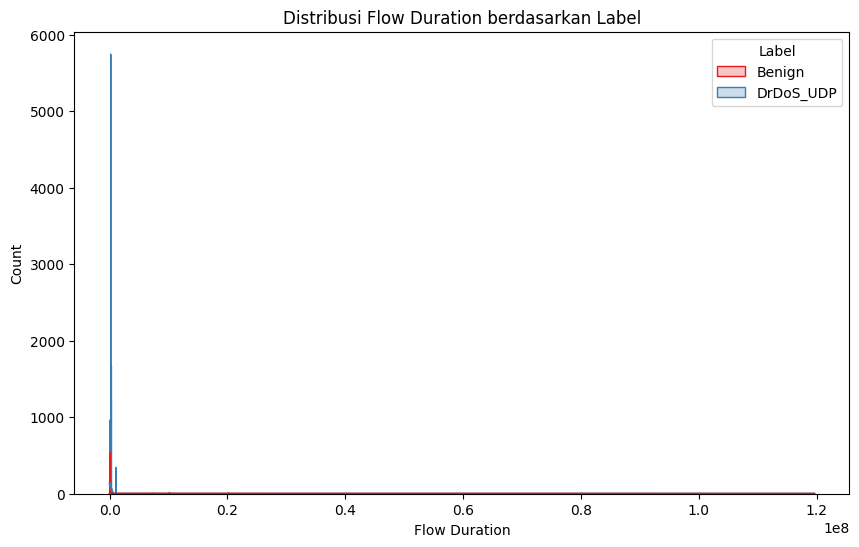

In [34]:
# Visualisasi distribusi label (misalnya jika ada kolom 'Label')
if 'Label' in df_UDP_Testing.columns:
    plt.figure(figsize=(8, 8))
    df_UDP_Testing["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
    plt.title("Distribusi Label (Benign vs DDoS_Udp)")
    plt.ylabel("")  # Menghilangkan label y agar lebih bersih
    plt.show()

    # Deskripsi singkat tentang distribusi label
    print("Deskripsi Distribusi Label:")
    label_counts = df_UDP_Testing["Label"].value_counts()
    print(label_counts)
else:
    print("\nKolom 'Label' tidak ditemukan dalam dataset.")

# Visualisasi distribusi fitur 'Flow Duration' jika kolom tersebut ada
if 'Flow Duration' in df_UDP_Testing.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_UDP_Testing, x="Flow Duration", hue="Label" if 'Label' in df_UDP_Testing.columns else None, element="step", palette="Set1", kde=True)
    plt.title("Distribusi Flow Duration berdasarkan Label")
    plt.xlabel("Flow Duration")


In [35]:
# membaca Dataset UDP Training
df_UDP_Training = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019\\UDP-training.parquet")
df_UDP_Training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  17770 non-null  int8    
 1   Flow Duration             17770 non-null  int32   
 2   Total Fwd Packets         17770 non-null  int16   
 3   Total Backward Packets    17770 non-null  int16   
 4   Fwd Packets Length Total  17770 non-null  float32 
 5   Bwd Packets Length Total  17770 non-null  float32 
 6   Fwd Packet Length Max     17770 non-null  float32 
 7   Fwd Packet Length Min     17770 non-null  float32 
 8   Fwd Packet Length Mean    17770 non-null  float32 
 9   Fwd Packet Length Std     17770 non-null  float32 
 10  Bwd Packet Length Max     17770 non-null  float32 
 11  Bwd Packet Length Min     17770 non-null  float32 
 12  Bwd Packet Length Mean    17770 non-null  float32 
 13  Bwd Packet Length Std     17770 non-null  floa

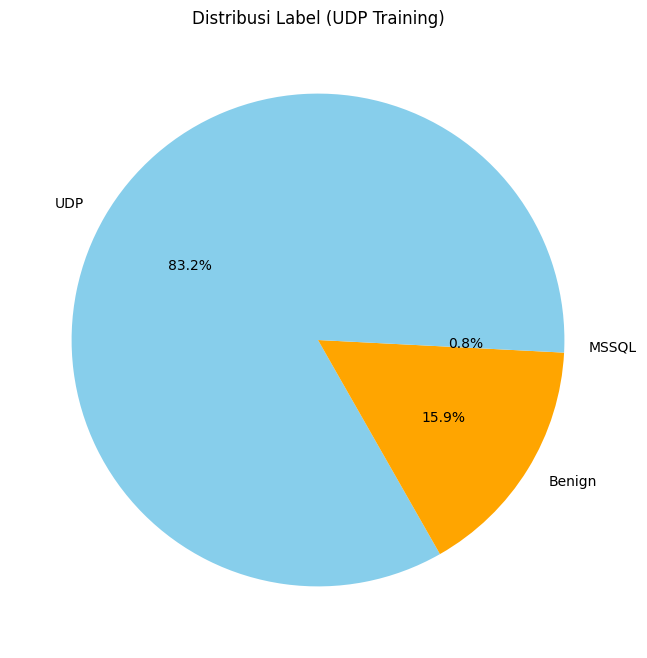

Deskripsi Distribusi Label:
UDP       14792
Benign     2833
MSSQL       145
Name: Label, dtype: int64


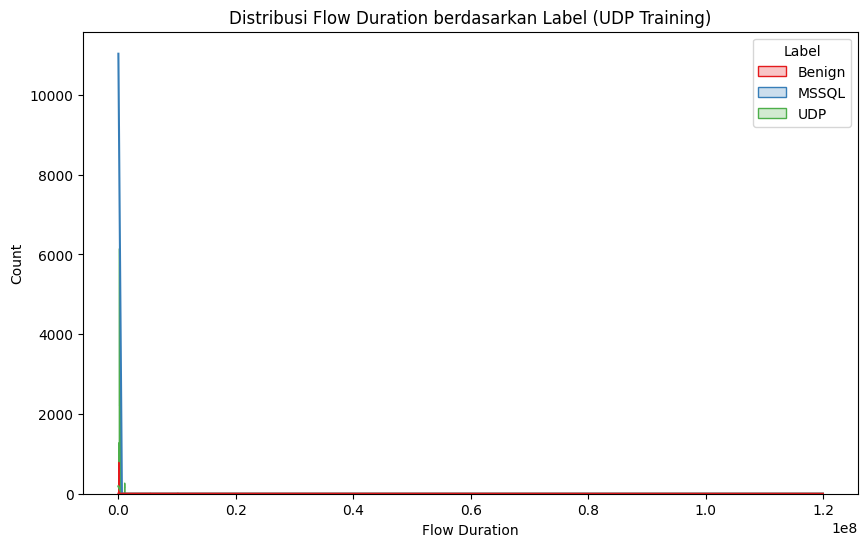


Deskripsi Flow Duration:
          count          mean           std  min        25%       50%  \
Label                                                                   
Benign   2833.0  8.032057e+06  2.535610e+07  1.0     910.00   21272.0   
MSSQL     145.0  1.486207e+01  1.131216e+02  1.0       1.00       1.0   
UDP     14792.0  1.598114e+05  1.659737e+05  1.0  106506.25  108555.0   

              75%          max  
Label                           
Benign  496291.00  119995583.0  
MSSQL        2.00       1359.0  
UDP     214382.25    1869692.0  


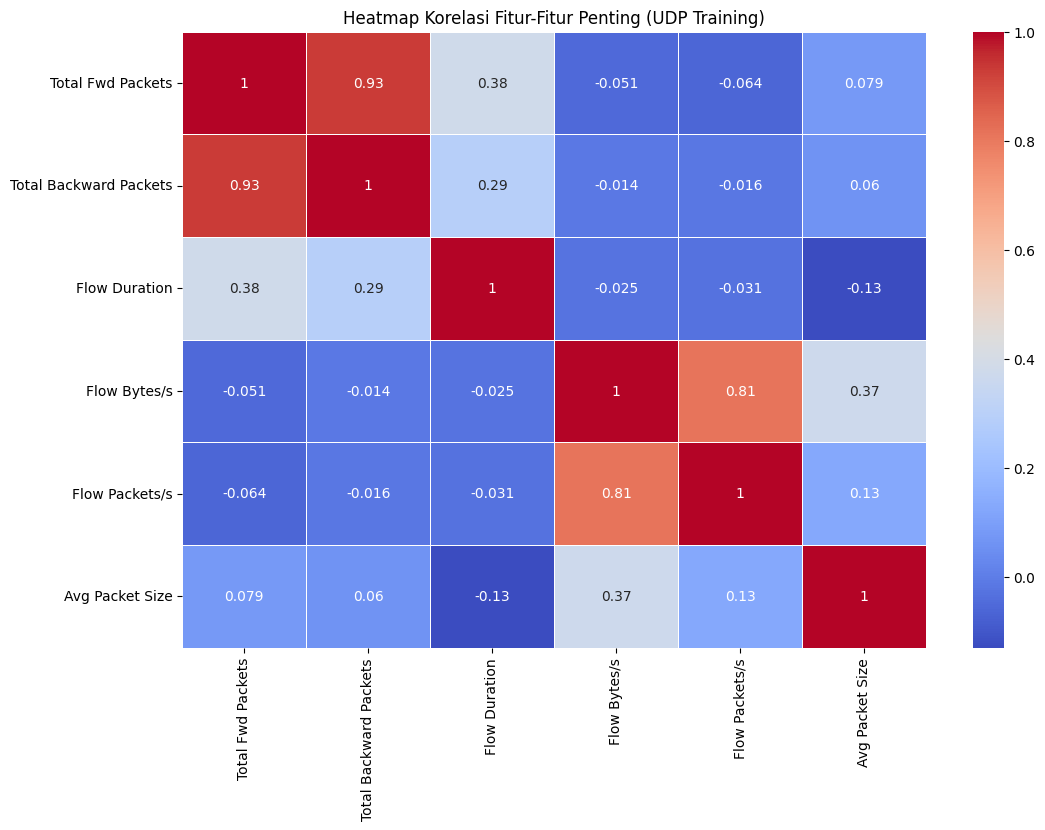


Deskripsi Korelasi Fitur:
                        Total Fwd Packets  Total Backward Packets  \
Total Fwd Packets                1.000000                0.930979   
Total Backward Packets           0.930979                1.000000   
Flow Duration                    0.377462                0.291014   
Flow Bytes/s                    -0.051321               -0.013643   
Flow Packets/s                  -0.063875               -0.016248   
Avg Packet Size                  0.078765                0.060171   

                        Flow Duration  Flow Bytes/s  Flow Packets/s  \
Total Fwd Packets            0.377462     -0.051321       -0.063875   
Total Backward Packets       0.291014     -0.013643       -0.016248   
Flow Duration                1.000000     -0.024788       -0.030685   
Flow Bytes/s                -0.024788      1.000000        0.812480   
Flow Packets/s              -0.030685      0.812480        1.000000   
Avg Packet Size             -0.130750      0.371064        0.12

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3270667824.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Bytes/s", data=df_UDP_Training, palette="Set2")
C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_18972\3270667824.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Flow Packets/s", data=df_UDP_Training, palette="Set2")


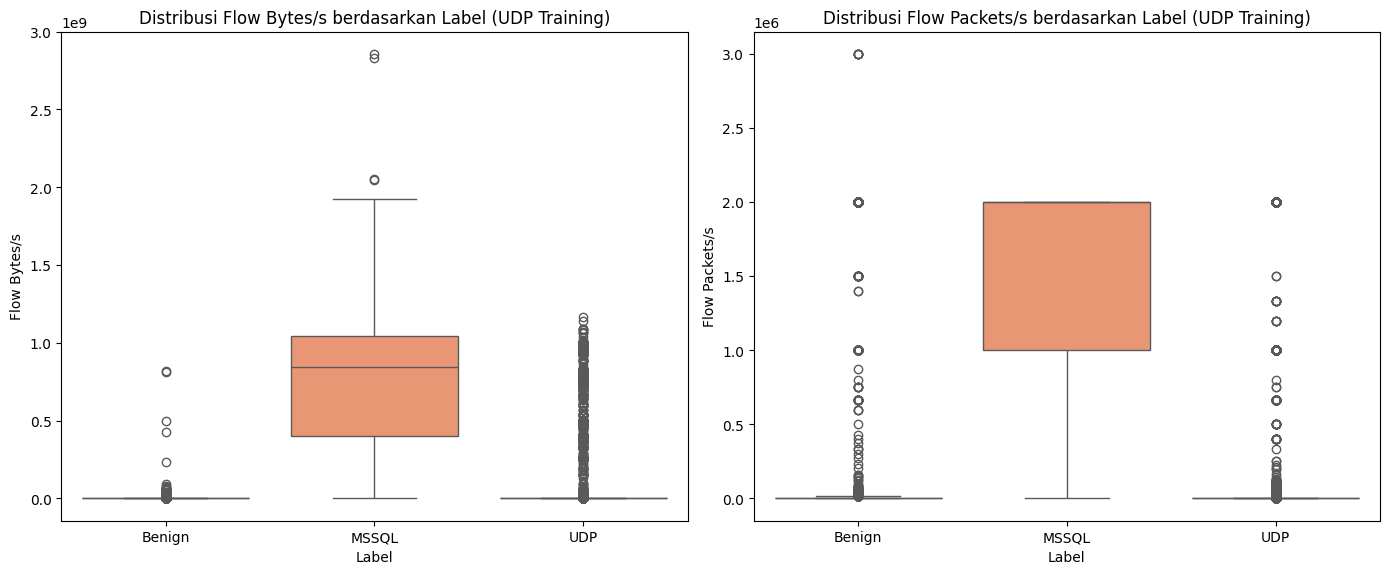


Deskripsi Flow Bytes/s dan Flow Packets/s:
       Flow Bytes/s                                                         \
              count          mean           std          min           25%   
Label                                                                        
Benign       2833.0  2.704542e+06  2.642429e+07     0.000000  2.186230e+02   
MSSQL         145.0  7.976016e+08  5.132593e+08     0.000000  4.030000e+08   
UDP         14792.0  2.355183e+07  1.272706e+08  2348.305696  9.745624e+03   

                                                 Flow Packets/s                \
                 50%           75%           max          count          mean   
Label                                                                           
Benign  7.329028e+03  4.674662e+04  8.180000e+08         2833.0  1.610397e+05   
MSSQL   8.420000e+08  1.042000e+09  2.858000e+09          145.0  1.471630e+06   
UDP     1.304707e+04  1.336403e+04  1.166000e+09        14792.0  5.578113e+04   



In [36]:
# Visualisasi distribusi label
plt.figure(figsize=(8, 8))
df_UDP_Training["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label (UDP Training)")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi singkat tentang distribusi label
print("Deskripsi Distribusi Label:")
label_counts = df_UDP_Training["Label"].value_counts()
print(label_counts)

# Visualisasi distribusi fitur 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df_UDP_Training, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label (UDP Training)")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi singkat tentang distribusi Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_UDP_Training.groupby("Label")["Flow Duration"].describe())

# Visualisasi korelasi antara beberapa fitur penting
features_of_interest = ["Total Fwd Packets", "Total Backward Packets", "Flow Duration", 
                        "Flow Bytes/s", "Flow Packets/s", "Avg Packet Size"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_UDP_Training[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting (UDP Training)")
plt.show()

# Deskripsi singkat tentang korelasi fitur-fitur penting
print("\nDeskripsi Korelasi Fitur:")
print(df_UDP_Training[features_of_interest].corr())

# Visualisasi Boxplot untuk melihat distribusi dari 'Flow Bytes/s' dan 'Flow Packets/s'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Flow Bytes/s", data=df_UDP_Training, palette="Set2")
plt.title("Distribusi Flow Bytes/s berdasarkan Label (UDP Training)")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Flow Packets/s", data=df_UDP_Training, palette="Set2")
plt.title("Distribusi Flow Packets/s berdasarkan Label (UDP Training)")

plt.tight_layout()
plt.show()

# Deskripsi singkat tentang distribusi Flow Bytes/s dan Flow Packets/s
print("\nDeskripsi Flow Bytes/s dan Flow Packets/s:")
print(df_UDP_Training.groupby("Label")[["Flow Bytes/s", "Flow Packets/s"]].describe())
